In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
##设置jupyter显示多行结果
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'

# 1-加载数据

In [221]:
#读取数据
data=pd.read_csv('./OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [222]:
#打印数据维度
print("Data set size:", data.shape)
print(data.info())

Data set size: (39644, 61)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_

# 2-数据预处理

In [223]:
# 查看数据是否有缺失值

if(data.isnull().values.any() == True):
  print("This dataset has some missing values which need to be handled")
  data = data.dropna()  # Rows with missing values (if any) are dropped

else:
  print("This dataset has no missing values. No action required.")

This dataset has no missing values. No action required.


In [224]:
data.describe().T  

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


In [225]:
# 查看shares的分布
data[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [226]:
# Observing the correlation values of features wrt target variable 'shares'
corr_values = data.corr(numeric_only=True)[' shares'].sort_values(ascending=False).drop(' shares')
corr_values

 kw_avg_avg                       0.110413
 LDA_03                           0.083771
 kw_max_avg                       0.064306
 self_reference_avg_sharess       0.057789
 self_reference_min_shares        0.055958
 self_reference_max_shares        0.047115
 num_hrefs                        0.045404
 kw_avg_max                       0.044686
 kw_min_avg                       0.039551
 num_imgs                         0.039388
 global_subjectivity              0.031604
 kw_avg_min                       0.030406
 kw_max_min                       0.030114
 abs_title_sentiment_polarity     0.027135
 num_videos                       0.023936
 title_subjectivity               0.021967
 num_keywords                     0.021818
 is_weekend                       0.016958
 weekday_is_saturday              0.015082
 title_sentiment_polarity         0.012772
 avg_positive_polarity            0.012142
 max_positive_polarity            0.010068
 weekday_is_monday                0.009726
 n_tokens_t

从上面的输出中可以看出没有一个特征与目标变量“shares”具有足够的相关性。因此，不应该期望单个特征和目标之间有很强的关系。

array([[<Axes: xlabel=' shares', ylabel=' shares'>,
        <Axes: xlabel=' kw_avg_avg', ylabel=' shares'>,
        <Axes: xlabel=' LDA_03', ylabel=' shares'>,
        <Axes: xlabel=' kw_max_avg', ylabel=' shares'>,
        <Axes: xlabel=' self_reference_avg_sharess', ylabel=' shares'>],
       [<Axes: xlabel=' shares', ylabel=' kw_avg_avg'>,
        <Axes: xlabel=' kw_avg_avg', ylabel=' kw_avg_avg'>,
        <Axes: xlabel=' LDA_03', ylabel=' kw_avg_avg'>,
        <Axes: xlabel=' kw_max_avg', ylabel=' kw_avg_avg'>,
        <Axes: xlabel=' self_reference_avg_sharess', ylabel=' kw_avg_avg'>],
       [<Axes: xlabel=' shares', ylabel=' LDA_03'>,
        <Axes: xlabel=' kw_avg_avg', ylabel=' LDA_03'>,
        <Axes: xlabel=' LDA_03', ylabel=' LDA_03'>,
        <Axes: xlabel=' kw_max_avg', ylabel=' LDA_03'>,
        <Axes: xlabel=' self_reference_avg_sharess', ylabel=' LDA_03'>],
       [<Axes: xlabel=' shares', ylabel=' kw_max_avg'>,
        <Axes: xlabel=' kw_avg_avg', ylabel=' kw_max_avg'

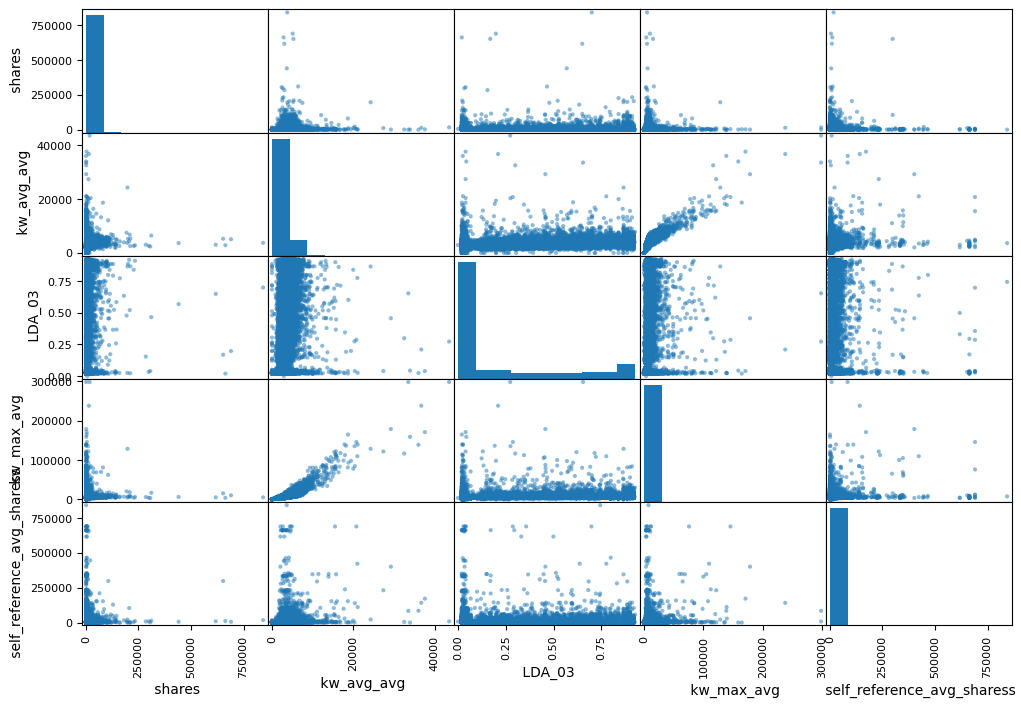

In [227]:
# 前 4 个相关特征和目标变量 'shares' 的散点图
from pandas.plotting import scatter_matrix
scatter_matrix(data[[' shares', ' kw_avg_avg', ' LDA_03', ' kw_max_avg', ' self_reference_avg_sharess']], figsize=(12,8))

In [228]:
#将数据去掉url,timedelta列只保留我们要聚类的特征
data1 = data.drop(columns='url')
data1 = data1.drop(columns=' timedelta')
feature_cols = data1.columns.tolist()

In [229]:
feature_cols
len(feature_cols)

[' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_rate_negative_words',
 

59

<Axes: >

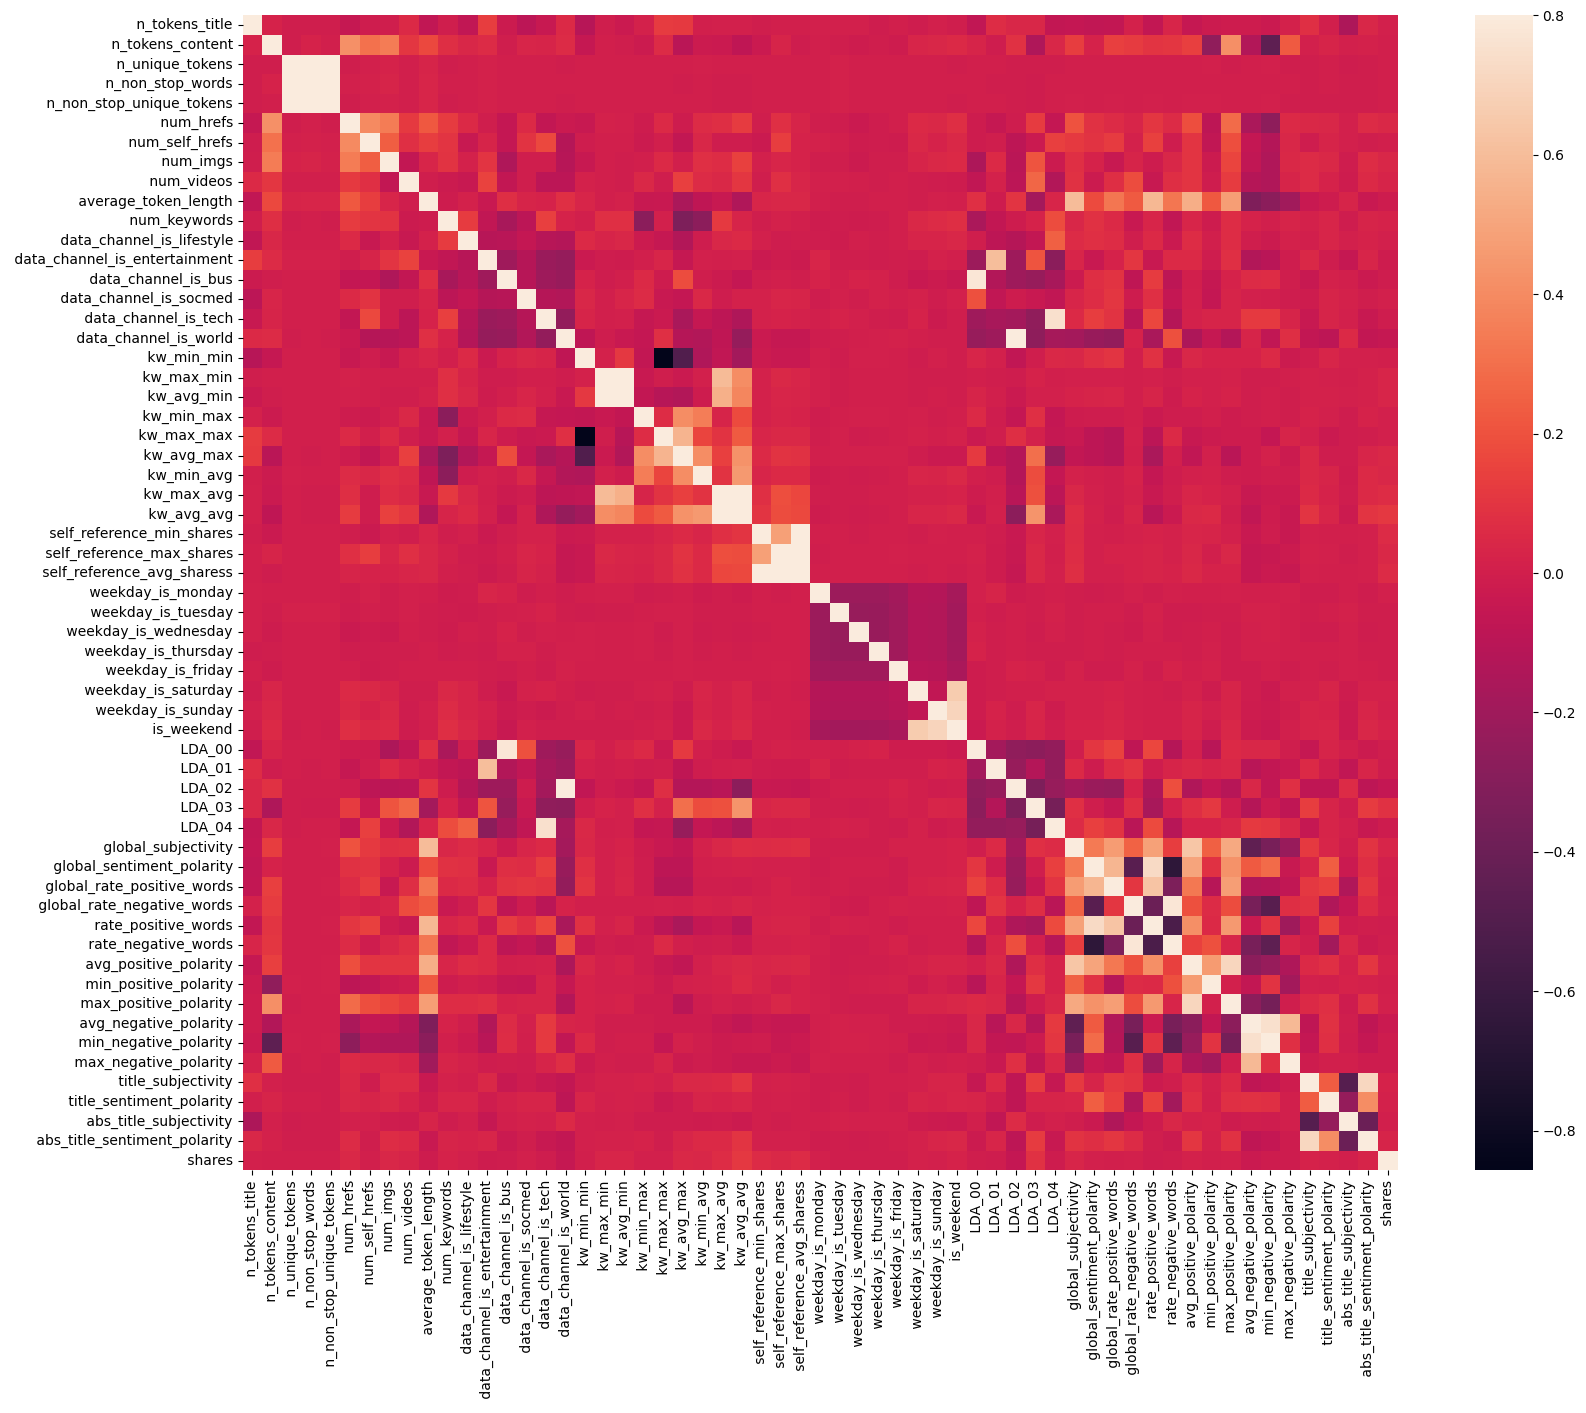

In [230]:
# 首先画出相关系数图，可以看到自变量之间可能存在共线性，用VIF检验判断
corrmat = data[feature_cols].corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [231]:
#VIF检验是检验自变量之间多重共线性的重要方式，一般认为VIF>5就说明自变量之间存在多重共线性
from statsmodels.stats.outliers_influence import variance_inflation_factor
#考虑对数值型自变量的多重共线性检验
X = data[feature_cols]
#务必注意，一定要加上常数项
X[len(feature_cols)+1]=1
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

C:\Users\12042\AppData\Local\Temp\ipykernel_16796\3945712268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[len(feature_cols)+1]=1


d:\Python3.8\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
d:\Python3.8\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


 n_tokens_title                   1.101544e+00
 n_tokens_content                 3.324083e+00
 n_unique_tokens                  1.367823e+04
 n_non_stop_words                 2.866077e+05
 n_non_stop_unique_tokens         8.483751e+03
 num_hrefs                        1.731832e+00
 num_self_hrefs                   1.414729e+00
 num_imgs                         1.654997e+00
 num_videos                       1.254854e+00
 average_token_length             1.260764e+01
 num_keywords                     1.506828e+00
 data_channel_is_lifestyle        2.341505e+00
 data_channel_is_entertainment    2.858051e+00
 data_channel_is_bus              5.837499e+00
 data_channel_is_socmed           2.293104e+00
 data_channel_is_tech             6.243396e+00
 data_channel_is_world            7.107588e+00
 kw_min_min                       3.830675e+00
 kw_max_min                       1.121044e+01
 kw_avg_min                       1.094542e+01
 kw_min_max                       1.388263e+00
 kw_max_max  

In [232]:
#首先对变量进行标准化，这里直接调用StandardScaler()函数
from sklearn.preprocessing import StandardScaler
data_new = data[feature_cols]
scaler = StandardScaler()
scaler.fit(data_new)

StandardScaler()

In [233]:
#把训练数据转换成标准的正态分布
scaled_data = scaler.transform(data_new)
scaled_data = pd.DataFrame(scaled_data)

array([4.79841710e+00, 4.00534082e+00, 3.59846591e+00, 3.00163880e+00,
       2.72069515e+00, 2.56807605e+00, 2.42556893e+00, 2.27824218e+00,
       2.11052870e+00, 2.03900837e+00, 2.00145419e+00, 1.88282807e+00,
       1.61286440e+00, 1.38344594e+00, 1.36372752e+00, 1.23577149e+00,
       1.22859125e+00, 1.21160880e+00, 1.19278796e+00, 1.17366323e+00,
       1.12889190e+00, 1.08539671e+00, 1.04609136e+00, 9.78524228e-01,
       9.05093075e-01, 8.65676632e-01, 8.06154738e-01, 7.21443848e-01,
       6.77044342e-01, 6.52589407e-01, 6.11107005e-01, 5.73053580e-01,
       5.57953917e-01, 5.34406537e-01, 4.70048432e-01, 4.60468633e-01,
       4.39652766e-01, 3.64447871e-01, 3.18708015e-01, 3.00616592e-01,
       2.44348605e-01, 2.40424179e-01, 2.22153539e-01, 1.91503046e-01,
       1.83493421e-01, 1.29366615e-01, 9.75908904e-02, 7.53693034e-02,
       7.99554233e-02, 5.96121386e-02, 5.26902358e-02, 2.57316055e-02,
       3.74756872e-02, 3.13788718e-02, 2.53847341e-04, 4.64320761e-05,
      

Text(0.5, 1.0, 'Screen Plot')

Text(0.5, 0, 'Components')

Text(0, 0.5, 'Eigenvalue')

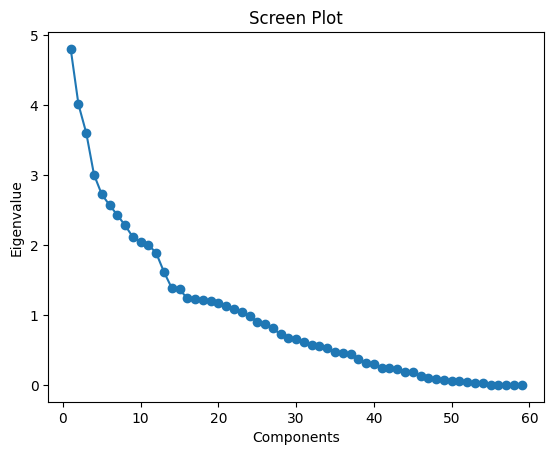

In [234]:
#接下来进行PCA降维，我们通过特征值选择合适的维度
from sklearn.decomposition import PCA
ev,v = np.linalg.eig(scaled_data.cov())
ev
ev_sorted = sorted(ev,reverse=True)
# 可视化
# plot横轴是指标个数，纵轴是ev值
# scatter横轴是指标个数，纵轴是ev值

plt.scatter(range(1,scaled_data.shape[1]+1),ev_sorted)
plt.plot(range(1,scaled_data.shape[1]+1),ev_sorted)
plt.title('Screen Plot')
plt.xlabel('Components')
plt.ylabel('Eigenvalue')
plt.show()

In [235]:
pca = PCA(n_components=20)
pca.fit(scaled_data)

PCA(n_components=20)

In [236]:
x_pca = pca.transform(scaled_data)

In [237]:
scaled_data.shape
x_pca.shape
x_pca

(39644, 59)

(39644, 20)

array([[-0.7522509 , -1.39204739, -1.9294654 , ...,  2.04110254,
         0.66839983,  0.64190455],
       [ 1.07668863, -3.68128373, -1.24243965, ...,  1.85135359,
         0.86819507,  0.7255055 ],
       [-2.97924517, -3.4888811 , -1.98157984, ...,  1.57010214,
         1.70924762,  0.96813366],
       ...,
       [-0.05206803,  2.42019284,  0.17224941, ...,  0.54844687,
        -1.35782465,  0.30185964],
       [ 3.38629723,  0.63098979, -3.16249553, ...,  0.17579142,
        -0.87703763,  0.1418726 ],
       [ 0.4293662 ,  0.15316232,  2.17847506, ...,  0.39110483,
        -0.97033185, -0.42945251]])

In [238]:
pca.components_
df=pd.DataFrame(pca.transform(scaled_data))#输出降维后的特征可用于之后的分析
df

array([[ 0.04173095, -0.14955741, -0.00668717, ...,  0.0396318 ,
        -0.08248296, -0.01841433],
       [ 0.07038199,  0.0739136 , -0.00042602, ..., -0.02185934,
         0.06412394,  0.04193876],
       [ 0.01154607, -0.14304593, -0.00967496, ..., -0.07387675,
         0.10038874,  0.05772222],
       ...,
       [-0.02028518, -0.00341974, -0.00303775, ..., -0.03575652,
         0.04499703,  0.0439398 ],
       [ 0.03804791, -0.00539343,  0.01019633, ...,  0.03879211,
        -0.05377827,  0.0793717 ],
       [ 0.07891292, -0.0275683 ,  0.00194965, ..., -0.00120826,
        -0.02026238,  0.05396607]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.752251,-1.392047,-1.929465,0.030301,-1.326872,-1.730711,2.787158,-2.103000,0.985406,-0.991424,0.567343,0.885096,1.520137,-0.034276,0.846302,-0.779907,0.015522,2.041103,0.668400,0.641905
1,1.076689,-3.681284,-1.242440,0.093623,-1.713660,1.182443,2.697338,0.030926,1.306175,-2.459551,0.963634,-0.253847,0.003365,0.476691,-0.906643,-0.650326,0.271659,1.851354,0.868195,0.725505
2,-2.979245,-3.488881,-1.981580,-0.087151,-1.025584,1.021849,2.258305,-0.798554,-0.239279,-1.051086,-0.123350,-0.272619,0.014098,-0.580477,0.009513,-0.180668,0.151596,1.570102,1.709248,0.968134
3,-0.054208,-0.976375,-3.326535,-0.068262,-0.076709,-0.809498,2.372602,-1.621446,-0.506862,-1.457014,0.238146,1.964601,0.574255,0.323528,0.340840,-0.625954,-0.041951,1.834110,0.960564,0.548762
4,-3.444131,-3.906905,-1.782631,-0.150573,1.253904,-1.633952,-2.213675,-0.911156,-0.025623,-0.549673,2.927457,-0.739605,-0.115163,0.677873,0.833402,-0.836627,0.116029,2.524129,0.440176,0.954696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,-0.191633,-0.720320,0.547454,0.027389,0.554325,1.764561,-1.811709,-1.442205,-1.719064,0.497799,0.150809,-1.339102,0.417194,0.464436,1.055637,1.924983,-0.665206,0.374588,-0.670054,0.367431
39640,-1.896350,1.077195,2.317725,0.003207,-1.360333,-2.943392,-0.269770,-0.865536,1.448420,1.448570,1.338735,0.808546,-3.495587,0.801114,0.118274,3.357632,0.591049,-1.524004,2.597282,2.158485
39641,-0.052068,2.420193,0.172249,0.006500,-0.218875,-0.662418,0.240331,-0.324674,-0.281346,0.665076,0.134094,-1.137396,-0.817552,-1.336460,-0.324479,1.711429,-0.697033,0.548447,-1.357825,0.301860
39642,3.386297,0.630990,-3.162496,0.008239,0.113299,1.525258,-0.089544,0.779342,0.405828,0.556856,-0.010756,0.570781,-0.679321,0.868226,-0.085279,1.748998,-0.704797,0.175791,-0.877038,0.141873


<Figure size 1200x600 with 0 Axes>

<Axes: >

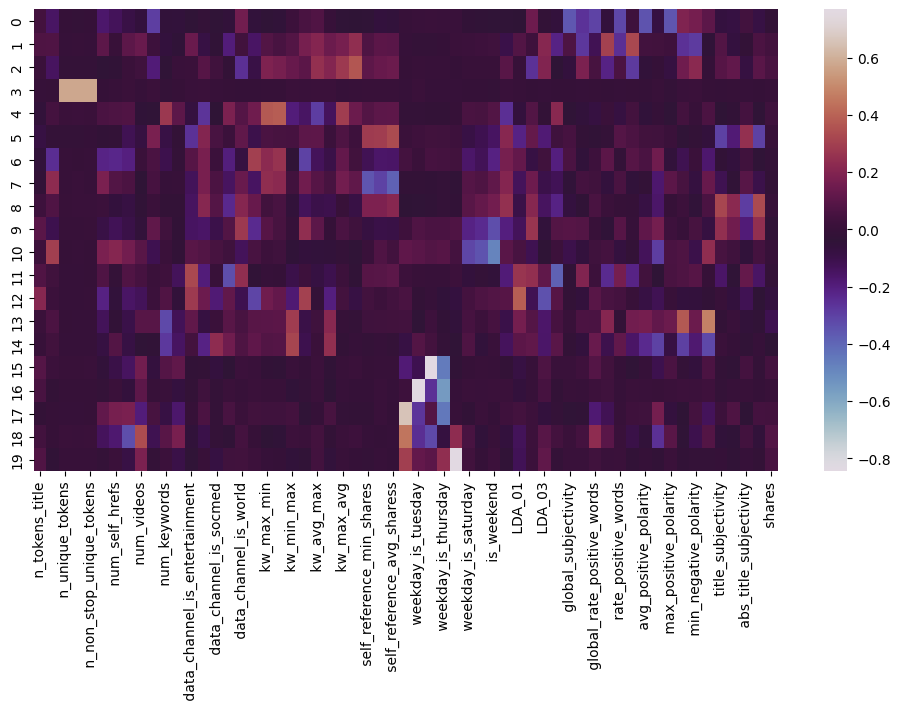

In [239]:
map= pd.DataFrame(pca.components_,columns=feature_cols)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

确实有共线性，通过主成分分析选出20个成分

In [240]:
# Here, we reduce the dimensions of the input data from 59 to 2 so that it can be visualised in 3D

from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
X_2D_pca = pca2.fit_transform(scaled_data)

print(f'\nPCA Features: Number of samples and attributes: {X_2D_pca.shape}')


PCA Features: Number of samples and attributes: (39644, 2)


Text(0.5, 0, 'PCA-1')

Text(0.5, 0.5, 'PCA-2')

Text(0.5, 0, 'Number of shares')

Text(0.5, 0.92, 'Visualisation of PCA reduced data in 3D')

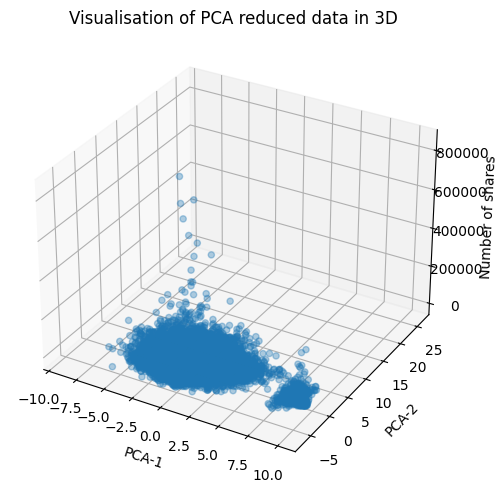

In [241]:
y_shares = data[' shares']

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_2D_pca[:, 0], X_2D_pca[:, 1], y_shares, alpha=0.35);

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Number of shares")

plt.title("Visualisation of PCA reduced data in 3D")
plt.tight_layout()
plt.show()
# fig.savefig('PCA visualisation.png')

Text(0.5, 0, 'PCA-1')

Text(0.5, 0.5, 'PCA-2')

Text(0.5, 0, 'Number of shares')

Text(0.5, 0.92, 'Visualisation of PCA reduced data in 3D')

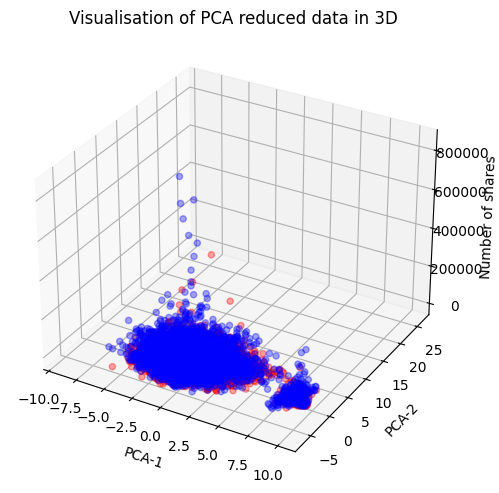

In [242]:
# Visualising the 3D point cloud of the PCA reduced dataset against the categorical target variable 'popularity'

from mpl_toolkits.mplot3d import Axes3D

data['popularity'] = np.where(data[' shares'] >= data[' shares'].median(), 1, 0)
y = data['popularity']

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

# Plotting separate 3D Scatterplots based on class labels of target variable 'popularity'
ax.scatter(X_2D_pca[y==0, 0], X_2D_pca[y==0, 1], y_shares[y==0], color="r", alpha=0.35); 
ax.scatter(X_2D_pca[y==1, 0], X_2D_pca[y==1, 1], y_shares[y==1], color="b", alpha=0.35); 

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Number of shares")

plt.title("Visualisation of PCA reduced data in 3D")
plt.tight_layout()
plt.show()
# fig.savefig('PCA visualisation.png')

Text(0.5, 0, 'PCA-1')

Text(0, 0.5, 'Number of shares')

Text(0.5, 1.0, 'Visualisation of PCA reduced data in 2D')

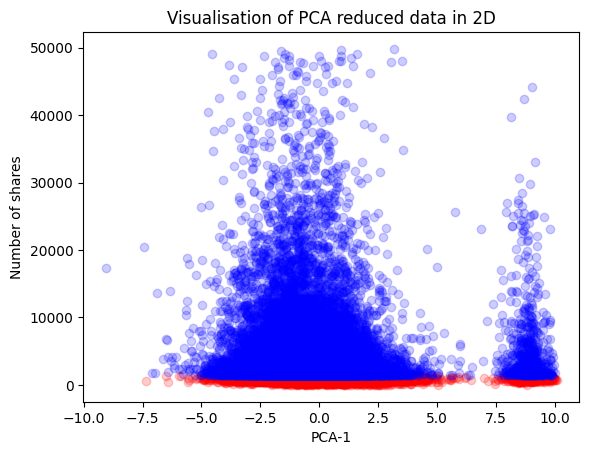

In [243]:
# Removing outliers to get a closer view of the body of the data - here we consider only data for which shares<50,000
X_2D_pca_50 = X_2D_pca[y_shares < 50000]
y_shares_50 = y_shares[y_shares < 50000]
y_50 = y[y_shares < 50000]

plt.scatter(X_2D_pca_50[y_50==0, 0], y_shares_50[y_50==0], color='r', alpha=0.20)
plt.scatter(X_2D_pca_50[y_50==1, 0], y_shares_50[y_50==1], color='b', alpha=0.20)
plt.xlabel("PCA-1")
plt.ylabel("Number of shares")
plt.title("Visualisation of PCA reduced data in 2D")

Text(0.5, 0, 'PCA-1')

Text(0.5, 0.5, 'PCA-2')

Text(0.5, 0, 'Popularity')

Text(0.5, 0.92, 'Visualisation of PCA reduced data in 3D')

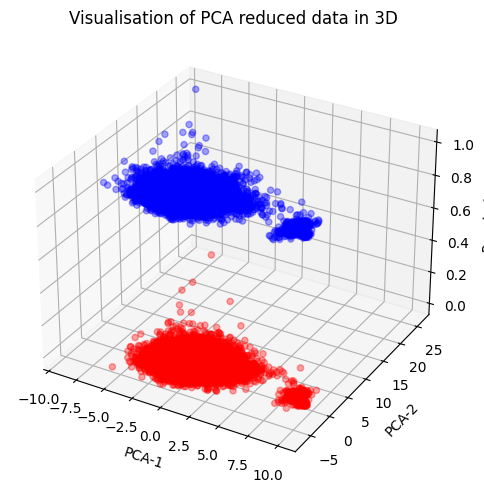

In [244]:
# Visualising the 3D point cloud of the PCA reduced dataset against the categorical target variable 'popularity'

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

# Plotting separate 3D Scatterplots based on class labels of target variable 'popularity'
ax.scatter(X_2D_pca[y==0, 0], X_2D_pca[y==0, 1], y[y==0], color="r", alpha=0.35); 
ax.scatter(X_2D_pca[y==1, 0], X_2D_pca[y==1, 1], y[y==1], color="b", alpha=0.35); 

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("Popularity")

plt.title("Visualisation of PCA reduced data in 3D")
plt.tight_layout()
plt.show()
# fig.savefig('PCA visualisation.png')

# 3-Task4 二分类模型

In [245]:
data['popularity'] = np.where(data[' shares'] >= data[' shares'].median(), 1, 0)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.0,164.000000,339.000000,542.000000,731.0
n_tokens_title,39644.0,10.398749,2.114037,2.0,9.000000,10.000000,12.000000,23.0
n_tokens_content,39644.0,546.514731,471.107508,0.0,246.000000,409.000000,716.000000,8474.0
n_unique_tokens,39644.0,0.548216,3.520708,0.0,0.470870,0.539226,0.608696,701.0
n_non_stop_words,39644.0,0.996469,5.231231,0.0,1.000000,1.000000,1.000000,1042.0
...,...,...,...,...,...,...,...,...
title_sentiment_polarity,39644.0,0.071425,0.265450,-1.0,0.000000,0.000000,0.150000,1.0
abs_title_subjectivity,39644.0,0.341843,0.188791,0.0,0.166667,0.500000,0.500000,0.5
abs_title_sentiment_polarity,39644.0,0.156064,0.226294,0.0,0.000000,0.000000,0.250000,1.0
shares,39644.0,3395.380184,11626.950749,1.0,946.000000,1400.000000,2800.000000,843300.0


## 三个数据集准备
1. 原始数据
2. PCA 降维后的数据 21 dim
3. RFE 确定的数据   21 dim

In [246]:
# 1) Regular Dataset
X = data.drop(['url', ' shares','popularity'], axis=1)  # Stores the input attributes data
y = data['popularity']                                  # Stores the target variable data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Inspecting the shape of the dataset and taking a peak into it
print(f"\nNumber of samples and attributes of X: {X.shape}\n")
X.head()


Number of samples and attributes of X: (39644, 59)



,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [247]:
# Standardized Dataset

# Standardizing the data subtracts the mean and scales the values to unit standard deviation
# It is applied to the input data to bring values to a standard range.

# Using the StandardScaler class to transform the regular data to Standardized data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X))

# Using train_test_split to create a new split for the Standardized input data
X_train_std, X_test_std = train_test_split(X_std, test_size=0.2, stratify=y, random_state=42)

# Inspecting the shape of the dataset after Standardization and taking a peak into it
print(f"\nNumber of samples and attributes of X after standardization: {X_std.shape}\n")
X_std.head()


Number of samples and attributes of X after standardization: (39644, 59)



,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.75788,0.757447,-0.695210,0.032772,0.000675,0.038658,-0.607463,-0.335566,-0.426526,-0.304268,...,0.237337,0.063865,-0.228941,-0.708369,-0.268895,-0.969886,0.671245,-0.975432,-1.810719,0.138920
1,1.75788,-0.661657,-0.618794,0.016056,0.000675,0.031479,-0.695709,-0.594963,-0.426526,-0.304268,...,-0.640040,-0.870968,-0.228941,1.102174,1.367424,0.078642,-0.870807,-0.269076,0.837749,-0.689658
2,1.75788,-0.661657,-0.712192,0.007645,0.000675,-0.007752,-0.695709,-0.594963,-0.426526,-0.304268,...,1.358401,0.063865,0.981798,-1.621797,-0.957871,-0.270867,-0.870807,-0.269076,0.837749,-0.689658
3,1.75788,-0.661657,-0.032933,-0.012619,0.000675,-0.007211,-0.166229,-0.854360,-0.426526,-0.304268,...,0.307442,0.573773,0.174639,-0.862584,-0.268895,-0.620377,-0.870807,-0.269076,0.837749,-0.689658
4,1.75788,1.230482,1.115439,-0.037655,0.000675,-0.045420,0.716237,4.074185,1.860061,-0.304268,...,0.548135,-0.870968,0.981798,0.307944,0.075594,0.602906,0.531059,0.244637,-1.569949,-0.087056


In [248]:
# 2) PCA Reduced Dataset

# Using PCA class to reduce dimensionality of the data from 59 to 20
from sklearn.decomposition import PCA
pca_n = PCA(n_components=21) # aligning with the number of components in the pca
X_pca = pd.DataFrame(pca_n.fit_transform(X_std))

X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, stratify=y, random_state=42)

print(f'Number of samples and attributes of X after PCA reduction: {X_pca.shape}')
X_pca.head()

Number of samples and attributes of X after PCA reduction: (39644, 21)


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.357736,-1.883916,-1.973704,-0.000836,0.432513,-3.608666,1.420111,-1.413744,0.463834,0.254970,...,1.103567,1.800385,0.031467,0.954597,-0.645187,-0.155352,2.099817,0.664921,0.820280,-0.355908
1,0.196343,-4.305858,-1.136308,0.083264,-0.352301,-1.563885,3.365067,0.302760,1.895643,-1.312674,...,0.004804,0.500959,0.481038,-0.943374,-0.526098,0.146410,1.885354,0.865682,0.786014,-0.203654
2,-3.731069,-3.497801,-1.735189,-0.078519,-0.387818,-0.862698,2.505258,-0.269728,-0.265400,-0.602602,...,-0.131725,0.388342,-0.563726,-0.029814,-0.087054,0.138706,1.571775,1.557878,1.232364,-0.556807
3,-0.670035,-1.695163,-3.436435,-0.105866,1.186968,-2.170598,1.392687,-1.005137,-0.530755,-0.917469,...,2.142650,0.794302,0.358707,0.341607,-0.563599,-0.135011,1.811014,0.837373,0.693084,-0.970267
4,-4.169497,-3.718803,-1.442605,-0.130628,0.372777,0.347696,-2.741440,-1.439418,0.529219,-0.897128,...,-0.673966,-0.097333,0.668351,0.778189,-0.738158,-0.008097,2.559476,0.398550,1.026569,1.262929


In [249]:
# 3) RFE Reduced Dataset
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#use linear regression as the model
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)


RFE(estimator=LinearRegression(), n_features_to_select=1)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False]
[48 46 49 19 16  8 39 37 41 42 36 33 20 12 10 18 30 13 45 53 52 55 58 56
 51 50 47 57 59 54 27 25 24 26 32 23 28  9  5  3  2  4  6  7 31 14  1 15
 17 40 11 35 38 43 44 29 21 22 34]


In [250]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
#use linear regression as the model
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

d:\Python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

RFE(estimator=LogisticRegression(), n_features_to_select=1)

[False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
[ 4 19  5 36 26 39  1 15  2 29 50 14 47 23 55 28 22 20  3  9  8 16 13 17
  7 11  6 10 12 18 44 34 32 40 48 27 30 21 31 33 24 49 25 45 46 54 59 38
 41 51 52 37 58 56 57 42 35 53 43]


In [251]:
list(X)

[' timedelta',
 ' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords',
 ' data_channel_is_lifestyle',
 ' data_channel_is_entertainment',
 ' data_channel_is_bus',
 ' data_channel_is_socmed',
 ' data_channel_is_tech',
 ' data_channel_is_world',
 ' kw_min_min',
 ' kw_max_min',
 ' kw_avg_min',
 ' kw_min_max',
 ' kw_max_max',
 ' kw_avg_max',
 ' kw_min_avg',
 ' kw_max_avg',
 ' kw_avg_avg',
 ' self_reference_min_shares',
 ' self_reference_max_shares',
 ' self_reference_avg_sharess',
 ' weekday_is_monday',
 ' weekday_is_tuesday',
 ' weekday_is_wednesday',
 ' weekday_is_thursday',
 ' weekday_is_friday',
 ' weekday_is_saturday',
 ' weekday_is_sunday',
 ' is_weekend',
 ' LDA_00',
 ' LDA_01',
 ' LDA_02',
 ' LDA_03',
 ' LDA_04',
 ' global_subjectivity',
 ' global_sentiment_polarity',
 ' global_rate_positive_words',
 ' global_rate_neg

In [252]:
X_RFE = data[[' LDA_02',' LDA_01',' LDA_03',' LDA_00',' LDA_04',' data_channel_is_socmed',' is_weekend',' data_channel_is_entertainment',' num_keywords',' global_subjectivity',' num_self_hrefs',' num_hrefs',' num_imgs',' num_videos',' n_tokens_title',' n_non_stop_unique_tokens',' n_non_stop_words',' global_rate_negative_words',' data_channel_is_tech',' rate_negative_words',' rate_positive_words']]
X_RFE = pd.DataFrame(sc.fit_transform(X_RFE))

In [253]:
X_train_RFE, X_test_RFE = train_test_split(X_RFE, test_size=0.2, stratify=y, random_state=42)

print(f"\nNumber of samples and attributes of X after standardization: {X_RFE.shape}\n")
X_RFE.head()


Number of samples and attributes of X after standardization: (39644, 21)



,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.624921,1.078827,-0.618276,1.200633,-0.670541,-0.249487,-0.388118,2.148880,-1.164821,0.670593,...,-0.607463,-0.426526,-0.304268,0.757447,0.038658,0.000675,-0.269079,-0.476911,-0.366077,0.457827
1,-0.589153,-0.415144,-0.588335,2.339253,-0.636381,-0.249487,-0.388118,-0.465359,-1.688626,-0.875228,...,-0.695709,-0.426526,-0.304268,-0.661657,0.031479,0.000675,-0.085507,-0.476911,-0.136192,0.269096
2,-0.648502,-0.491211,-0.645137,0.126224,1.549759,-0.249487,-0.388118,-0.465359,-0.641015,2.218418,...,-0.695709,-0.426526,-0.304268,-0.661657,-0.007752,0.000675,-0.658817,-0.476911,-0.929060,0.920026
3,0.986490,1.265535,-0.660140,-0.593319,-0.710484,-0.249487,-0.388118,2.148880,-0.117210,-0.115874,...,-0.166229,-0.426526,-0.304268,-0.661657,-0.007211,0.000675,0.378984,-0.476911,0.290738,-0.081405
4,-0.665431,-0.511879,-0.661269,-0.593092,2.252569,-0.249487,-0.388118,-0.465359,-0.117210,0.601046,...,0.716237,1.860061,-0.304268,1.230482,-0.045420,0.000675,-0.414241,2.096826,-0.948734,0.936179


##  分类模型
1. Logistic Regression
2. Linear SVC
3. Linear kernel SVC
4. Polynomial Kernel SVC
5. Decision Tree
6. Random Forest
7. AdaBoost 

### Baseline Model - Logistic Regression

#### **Regular Data**

In [133]:
# Creating a logistic regression model and fitting it to the training data

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# The model's score on the testing data
print("REGULAR DATA")
lr_score = lr_clf.score(X_test, y_test).round(5)
print('Classification accuracy: ', lr_score)

d:\Python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

REGULAR DATA
Classification accuracy:  0.58305


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression with Regular Data')

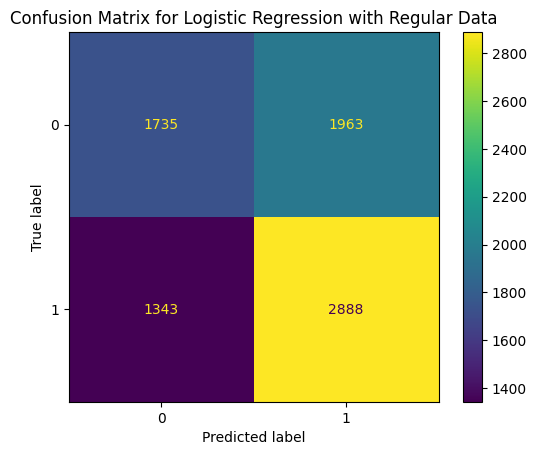

In [134]:
## Confusion Matrix

# Model's predictions on the test data
y_pred = lr_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp_lr = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred))
disp_lr.plot()
plt.title("Confusion Matrix for Logistic Regression with Regular Data")
plt.show()

In [135]:
# Classification report

from sklearn.metrics import classification_report

lr_report = classification_report(y_test, lr_clf.predict(X_test))
print(lr_report)

              precision    recall  f1-score   support

           0       0.56      0.47      0.51      3698
           1       0.60      0.68      0.64      4231

    accuracy                           0.58      7929
   macro avg       0.58      0.58      0.57      7929
weighted avg       0.58      0.58      0.58      7929



In [136]:
# Cross validation of the model using 5 folds in terms of mean +/- std

from sklearn.model_selection import cross_val_score

cv_scores_lr = cross_val_score(lr_clf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_lr = (str(cv_scores_lr.mean().round(5)) + ' +/- ' + str(cv_scores_lr.std().round(5)))
print('\n', cv_score_lr)

d:\Python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu


 0.58698 +/- 0.00565


d:\Python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### **PCA Data**

In [137]:
### Logistic Regression with Dimensionality Reduction (PCA)

# Creating a logistic regression model and fitting it to the training data
lr_clf_pca = LogisticRegression()
lr_clf_pca.fit(X_train_pca, y_train)

# The model's score on the testing data
print('PCA REDUCED DATA')
lr_score_pca = lr_clf_pca.score(X_test_pca, y_test).round(5)
print('Classification accuracy: ', lr_score_pca)

LogisticRegression()

PCA REDUCED DATA
Classification accuracy:  0.63615


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression with PCA')

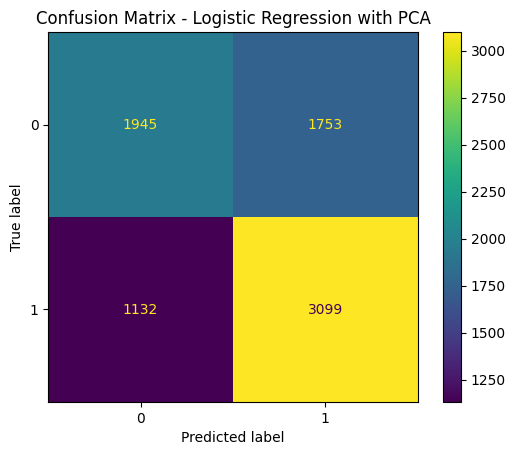

In [138]:
## Confusion Matrix - After PCA

# Model's predictions on the test data
y_pred_pca = lr_clf_pca.predict(X_test_pca)

disp_lr_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_pca))
disp_lr_pca.plot()
plt.title('Confusion Matrix - Logistic Regression with PCA')
plt.show()

In [139]:
# Classification report - After PCA

lr_pca_report = classification_report(y_test, lr_clf_pca.predict(X_test_pca))
print(lr_pca_report)

              precision    recall  f1-score   support

           0       0.63      0.53      0.57      3698
           1       0.64      0.73      0.68      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.63      0.63      7929
weighted avg       0.64      0.64      0.63      7929



In [140]:
# Cross validation of the model using 5 folds in terms of mean +/- std

cv_scores_lr_pca = cross_val_score(lr_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_lr_pca = (str(cv_scores_lr_pca.mean().round(5)) + ' +/- ' + str(cv_scores_lr_pca.std().round(5)))
print('\n', cv_score_lr_pca)


 0.63229 +/- 0.00806


#### **RFE data**

In [143]:
### Logistic Regression with RFE

# Creating a logistic regression model and fitting it to the training data
lr_clf_rfe = LogisticRegression()
lr_clf_rfe.fit(X_train_RFE, y_train)

# The model's score on the testing data
print('RFE REDUCED DATA')
lr_score_rfe = lr_clf_rfe.score(X_test_RFE, y_test).round(5)
print('Classification accuracy: ', lr_score_rfe)

LogisticRegression()

RFE REDUCED DATA
Classification accuracy:  0.63287


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression with RFE')

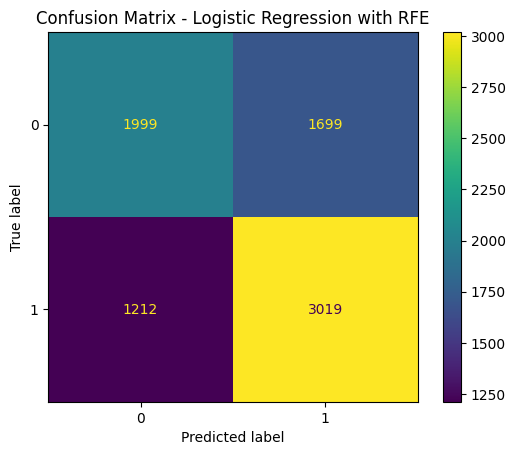

In [144]:
## Confusion Matrix - After RFE

# Model's predictions on the test data
y_pred_rfe = lr_clf_rfe.predict(X_test_RFE)

disp_lr_rfe = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_rfe))
disp_lr_rfe.plot()
plt.title('Confusion Matrix - Logistic Regression with RFE')
plt.show()

In [147]:
# Classification report - After RFE

lr_rfe_report = classification_report(y_test, lr_clf_rfe.predict(X_test_RFE))
print(lr_rfe_report)

              precision    recall  f1-score   support

           0       0.62      0.54      0.58      3698
           1       0.64      0.71      0.67      4231

    accuracy                           0.63      7929
   macro avg       0.63      0.63      0.63      7929
weighted avg       0.63      0.63      0.63      7929



In [145]:
# Cross validation of the model using 5 folds in terms of mean +/- std

cv_scores_lr_rfe = cross_val_score(lr_clf_rfe, X_train_RFE, y_train, scoring='f1_weighted', cv=5)
cv_score_lr_rfe = (str(cv_scores_lr_rfe.mean().round(5)) + ' +/- ' + str(cv_scores_lr_rfe.std().round(5)))
print('\n', cv_score_lr_rfe)


 0.63048 +/- 0.00571


### SVM Classification

#### Using LinearSVC

Regular Data

In [92]:
# Fitting the data into LinearSVC model

from sklearn.svm import LinearSVC

lin_svc = LinearSVC(C=2)
lin_svc.fit(X_train, y_train)

# The LinearSVC model's score on the testing data
print('REGULAR DATA')
lin_svc_score = lin_svc.score(X_test, y_test).round(5)
print('Classification accuracy: ', lin_svc_score)

d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=2)

REGULAR DATA
Classification accuracy:  0.46601


Text(0.5, 1.0, 'Confusion Matrix - LinearSVC with Regular Data')

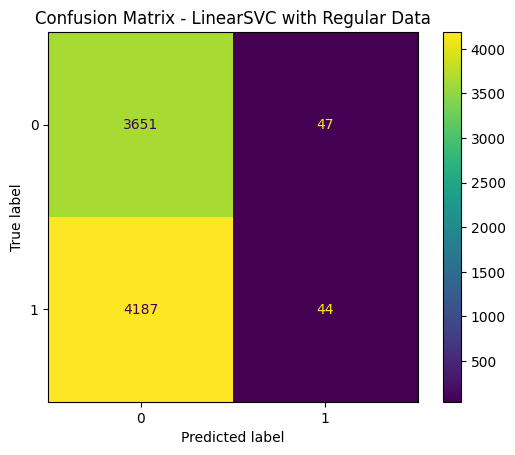

In [93]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_linsvc = lin_svc.predict(X_test)

disp_linsvc = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_linsvc))
disp_linsvc.plot()
plt.title('Confusion Matrix - LinearSVC with Regular Data')
plt.show()

In [94]:
# LinearSVC Classification report

linsvc_report = classification_report(y_test, lin_svc.predict(X_test))
print(linsvc_report)


              precision    recall  f1-score   support

           0       0.47      0.99      0.63      3698
           1       0.48      0.01      0.02      4231

    accuracy                           0.47      7929
   macro avg       0.47      0.50      0.33      7929
weighted avg       0.48      0.47      0.31      7929



In [95]:
# Cross validation of the LinearSVC model using 5 folds in terms of mean +/- std

cv_scores_linsvc = cross_val_score(lin_svc, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_linsvc = (str(cv_scores_linsvc.mean().round(5)) + ' +/- ' + str(cv_scores_linsvc.std().round(5)))
print('\n', cv_score_linsvc)

d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.


 0.47361 +/- 0.02638


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


PCA data

In [148]:
# Fitting the PCA Reduced data into LinearSVC model
lin_svc_pca = LinearSVC(tol=0.01, C=2)
lin_svc_pca.fit(X_train_pca, y_train)

# The LinearSVC model's score on the testing data
print('PCA REDUCED DATA')
lin_svc_score_pca = lin_svc_pca.score(X_test_pca, y_test).round(5)
print('Classification accuracy: ', lin_svc_score_pca)

d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=2, tol=0.01)

PCA REDUCED DATA
Classification accuracy:  0.63753


Text(0.5, 1.0, 'LinearSVC Confusion Matrix - After PCA')

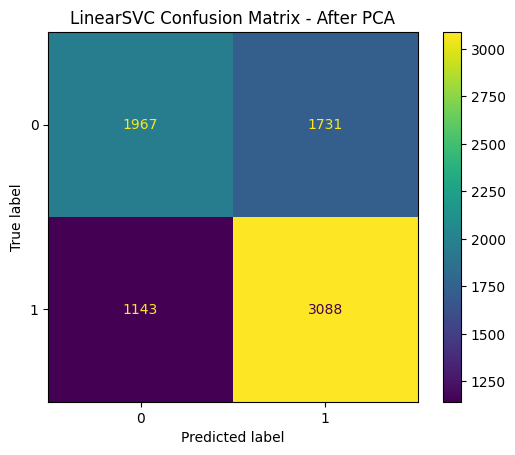

In [149]:
## Confusion Matrix - After PCA

# Model's predictions on the test data
y_pred_linsvc_pca = lin_svc_pca.predict(X_test_pca)

disp_linsvc_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_linsvc_pca))
disp_linsvc_pca.plot()
plt.title('LinearSVC Confusion Matrix - After PCA')
plt.show()

In [150]:
# LinearSVC Classification report - After PCA

linsvc_pca_report = classification_report(y_test, lin_svc_pca.predict(X_test_pca))
print(linsvc_pca_report)

              precision    recall  f1-score   support

           0       0.63      0.53      0.58      3698
           1       0.64      0.73      0.68      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.63      0.63      7929
weighted avg       0.64      0.64      0.63      7929



In [151]:
# Cross validation of the LinearSVC model using 5 folds in terms of mean +/- std

cv_scores_linsvc_pca = cross_val_score(lin_svc_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_linsvc_pca = (str(cv_scores_linsvc_pca.mean().round(5)) + ' +/- ' + str(cv_scores_linsvc_pca.std().round(5)))
print('\n', cv_score_linsvc_pca)

d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.


 0.63373 +/- 0.00877


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RFE Data

d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=2, tol=0.01)

RFE REDUCED DATA
Classification accuracy:  0.63224


Text(0.5, 1.0, 'LinearSVC Confusion Matrix - After RFE')

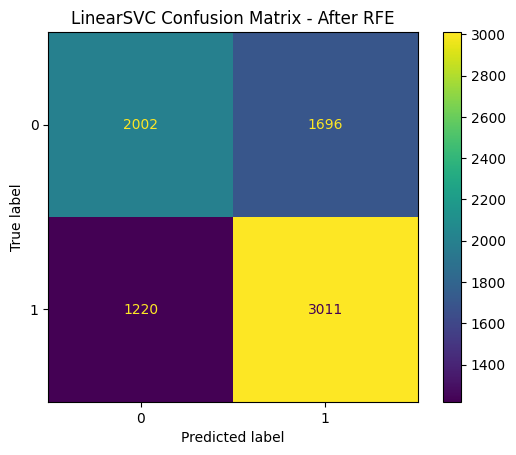

              precision    recall  f1-score   support

           0       0.62      0.54      0.58      3698
           1       0.64      0.71      0.67      4231

    accuracy                           0.63      7929
   macro avg       0.63      0.63      0.63      7929
weighted avg       0.63      0.63      0.63      7929



d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.


 0.62998 +/- 0.00594


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [164]:
lin_svc_rfe = LinearSVC(tol=0.01, C=2)
lin_svc_rfe.fit(X_train_RFE, y_train)

print('RFE REDUCED DATA')
lin_svc_score_rfe = lin_svc_rfe.score(X_test_RFE, y_test).round(5)
print('Classification accuracy: ', lin_svc_score_rfe)

y_pred_linsvc_rfe = lin_svc_rfe.predict(X_test_RFE)

disp_linsvc_rfe = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_linsvc_rfe))
disp_linsvc_rfe.plot()
plt.title('LinearSVC Confusion Matrix - After RFE')
plt.show()

# LinearSVC Classification report - After RFE

linsvc_rfe_report = classification_report(y_test, lin_svc_rfe.predict(X_test_RFE))
print(linsvc_rfe_report)

# Cross validation of the LinearSVC model using 5 folds in terms of mean +/- std

cv_scores_linsvc_rfe = cross_val_score(lin_svc_rfe, X_train_RFE, y_train, scoring='f1_weighted', cv=5)
cv_score_linsvc_rfe = (str(cv_scores_linsvc_rfe.mean().round(5)) + ' +/- ' + str(cv_scores_linsvc_rfe.std().round(5)))
print('\n', cv_score_linsvc_rfe)


### Using SVR with kernel

Implemented on PCA and RFE Reduced dataset only - due to high computational time for datasets with more features

**Linear Kernel**

**PCA Data**

In [152]:
# Fit the data into SVR model with linear kernel
from sklearn.svm import SVC

svc_lin = SVC(kernel='linear', C=2)
svc_lin.fit(X_train_pca, y_train)

# Linear kernel SVC model's score on testing data
print('LINEAR KERNEL')
svc_lin_score = svc_lin.score(X_test_pca, y_test).round(5)
print('Classification accuracy: ', svc_lin_score)

SVC(C=2, kernel='linear')

LINEAR KERNEL
Classification accuracy:  0.62391


Text(0.5, 1.0, 'Confusion Matrix - Linear Kernel')

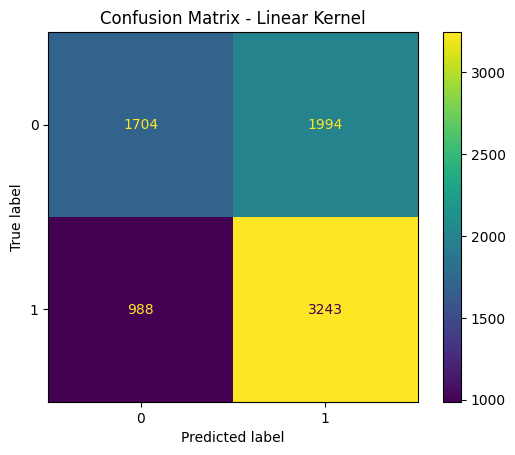

In [153]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_svclin = svc_lin.predict(X_test_pca)

disp_svclin = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_svclin))
disp_svclin.plot()
plt.title('Confusion Matrix - Linear Kernel - PCA Data')
plt.show()

In [154]:
# Classification report - Linear Kernel SVC

svc_lin_report = classification_report(y_test, svc_lin.predict(X_test_pca))
print(svc_lin_report)

              precision    recall  f1-score   support

           0       0.63      0.46      0.53      3698
           1       0.62      0.77      0.69      4231

    accuracy                           0.62      7929
   macro avg       0.63      0.61      0.61      7929
weighted avg       0.63      0.62      0.61      7929



In [155]:
# Cross validation of the Linear Kernel SVC model using 5 folds in terms of mean +/- std

cv_scores_svclin = cross_val_score(svc_lin, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_svclin = (str(cv_scores_svclin.mean().round(5)) + ' +/- ' + str(cv_scores_svclin.std().round(5)))
print('\n', cv_score_svclin)


 0.6167 +/- 0.00878


**RFE Data**

SVC(C=2, kernel='linear')

LINEAR KERNEL
Classification accuracy:  0.62328


Text(0.5, 1.0, 'Confusion Matrix - Linear Kernel - RFE Data')

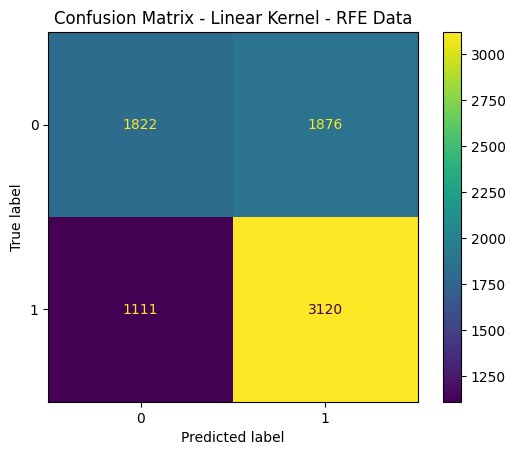

In [160]:
# Fit the data into SVR model with linear kernel
from sklearn.svm import SVC

svc_lin_rfe = SVC(kernel='linear', C=2)
svc_lin_rfe.fit(X_train_RFE, y_train)

# Linear kernel SVC model's score on testing data
print('LINEAR KERNEL')
svc_lin_score_rfe = svc_lin_rfe.score(X_test_RFE, y_test).round(5)
print('Classification accuracy: ', svc_lin_score_rfe)

## Confusion Matrix

# Model's predictions on the test data
y_pred_svclin_rfe = svc_lin_rfe.predict(X_test_RFE)

disp_svclin_rfe = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_svclin_rfe))
disp_svclin_rfe.plot()
plt.title('Confusion Matrix - Linear Kernel - RFE Data')    
plt.show()

In [161]:
# Classification report - Linear Kernel SVC
svc_lin_report_rfe = classification_report(y_test, svc_lin_rfe.predict(X_test_RFE))
print(svc_lin_report_rfe)

# Cross validation of the Linear Kernel SVC model using 5 folds in terms of mean +/- std
cv_scores_svclin_rfe = cross_val_score(svc_lin_rfe, X_train_RFE, y_train, scoring='f1_weighted', cv=5)
cv_score_svclin_rfe = (str(cv_scores_svclin_rfe.mean().round(5)) + ' +/- ' + str(cv_scores_svclin_rfe.std().round(5)))
print('\n', cv_score_svclin_rfe)

              precision    recall  f1-score   support

           0       0.62      0.49      0.55      3698
           1       0.62      0.74      0.68      4231

    accuracy                           0.62      7929
   macro avg       0.62      0.62      0.61      7929
weighted avg       0.62      0.62      0.62      7929


 0.61682 +/- 0.00717


**Polynomial Kernel**

**PCA Data**

In [156]:
# Fit the data into SVR model with polynomial kernel
svc_poly = SVC(kernel='poly', C=2)
svc_poly.fit(X_train_pca, y_train)

# Polynomial kernel SVC model's score on testing data
print('POLYNOMIAL KERNEL')
svc_poly_score = svc_poly.score(X_test_pca, y_test).round(5)
print('Classification accuracy: ', svc_poly_score)

SVC(C=2, kernel='poly')

POLYNOMIAL KERNEL
Classification accuracy:  0.64611


Text(0.5, 1.0, 'Confusion Matrix - Polynomial Kernel SVC')

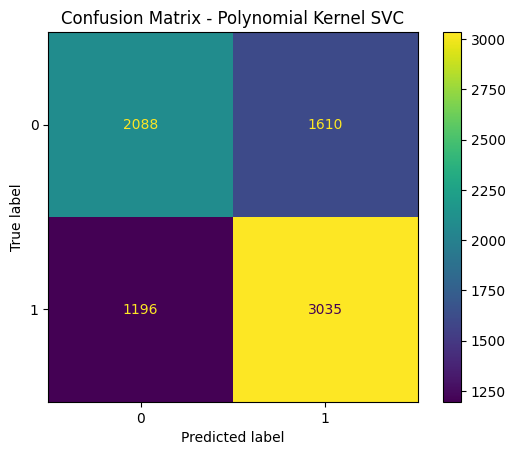

In [157]:
## Confusion Matrix

# Model's predictions on the test data
y_pred_svcpoly = svc_poly.predict(X_test_pca)

disp_svcpoly = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_svcpoly))
disp_svcpoly.plot()
plt.title('Confusion Matrix - Polynomial Kernel SVC')
plt.show()

In [158]:
# Classification report - Polynomial Kernel SVC

svc_poly_report = classification_report(y_test, svc_poly.predict(X_test_pca))
print(svc_poly_report)

              precision    recall  f1-score   support

           0       0.64      0.56      0.60      3698
           1       0.65      0.72      0.68      4231

    accuracy                           0.65      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.65      0.65      0.64      7929



In [159]:
# Cross validation of the Polynomial Kernel SVC model using 5 folds in terms of mean +/- std

cv_scores_svcpoly = cross_val_score(svc_poly, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_svcpoly = (str(cv_scores_svcpoly.mean().round(5)) + ' +/- ' + str(cv_scores_svcpoly.std().round(5)))
print('\n', cv_score_svcpoly)


 0.64094 +/- 0.00669


**RFE Data**

SVC(C=2, kernel='poly')

POLYNOMIAL KERNEL-RFE Data
Classification accuracy:  0.63842


Text(0.5, 1.0, 'Confusion Matrix - Polynomial Kernel SVC - RFE Data')

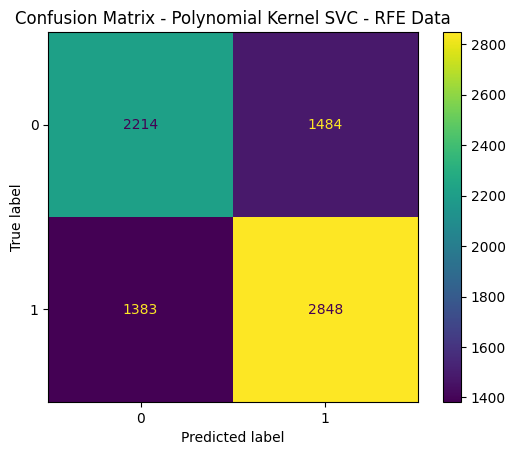

In [162]:
# Fit the data into SVR model with polynomial kernel
svc_poly_rfe = SVC(kernel='poly', C=2)
svc_poly_rfe.fit(X_train_RFE, y_train)

# Polynomial kernel SVC model's score on testing data
print('POLYNOMIAL KERNEL-RFE Data')
svc_poly_score_rfe = svc_poly_rfe.score(X_test_RFE, y_test).round(5)
print('Classification accuracy: ', svc_poly_score_rfe)
## Confusion Matrix

# Model's predictions on the test data
y_pred_svcpoly_rfe = svc_poly_rfe.predict(X_test_RFE)

disp_svcpoly_rfe = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_svcpoly_rfe))
disp_svcpoly_rfe.plot()
plt.title('Confusion Matrix - Polynomial Kernel SVC - RFE Data')
plt.show()

In [163]:
# Classification report - Polynomial Kernel SVC
svc_poly_report_rfe = classification_report(y_test, svc_poly_rfe.predict(X_test_RFE))
print(svc_poly_report_rfe)

# Cross validation of the Polynomial Kernel SVC model using 5 folds in terms of mean +/- std
cv_scores_svcpoly_rfe = cross_val_score(svc_poly_rfe, X_train_RFE, y_train, scoring='f1_weighted', cv=5)
cv_score_svcpoly_rfe = (str(cv_scores_svcpoly_rfe.mean().round(5)) + ' +/- ' + str(cv_scores_svcpoly_rfe.std().round(5)))
print('\n', cv_score_svcpoly_rfe)

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      3698
           1       0.66      0.67      0.67      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.64      0.64      7929


 0.64033 +/- 0.01045


### Decision Trees

**Regular Data**

DecisionTreeClassifier(max_leaf_nodes=32, random_state=42)

REGULAR DATA
Classification accuracy:  0.64699


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree Classifier with Regular Data')

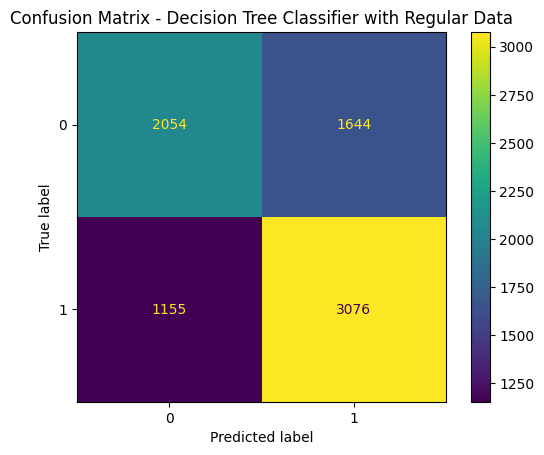

              precision    recall  f1-score   support

           0       0.64      0.56      0.59      3698
           1       0.65      0.73      0.69      4231

    accuracy                           0.65      7929
   macro avg       0.65      0.64      0.64      7929
weighted avg       0.65      0.65      0.64      7929


 0.64118 +/- 0.00636


In [165]:
# Importing the DecisionTreeClassifier class from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Fitting the data into Decision Tree Classifier model
DT_clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=32, random_state=42)
DT_clf.fit(X_train, y_train)

# The Decision Tree Classifier model's score on the testing data
print('REGULAR DATA')
DT_clf_score = DT_clf.score(X_test, y_test).round(5)
print('Classification accuracy: ', DT_clf_score)

## Confusion Matrix

# Model's predictions on the test data
y_pred_DT = DT_clf.predict(X_test)

disp_DT = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_DT))
disp_DT.plot()
plt.title('Confusion Matrix - Decision Tree Classifier with Regular Data')
plt.show()

# Decision Tree Classifier - Classification report

DT_report = classification_report(y_test, y_pred_DT)
print(DT_report)

# Cross validation of the Decision Tree Classifier model using 5 folds in terms of mean +/- std

cv_scores_DT = cross_val_score(DT_clf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_DT = (str(cv_scores_DT.mean().round(5)) + ' +/- ' + str(cv_scores_DT.std().round(5)))
print('\n', cv_score_DT)

**PCA Reduced Data**

DecisionTreeClassifier(max_leaf_nodes=32, random_state=42)

PCA REDUCED DATA
Classification accuracy:  0.61937


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree Classifier with PCA Reduced Data')

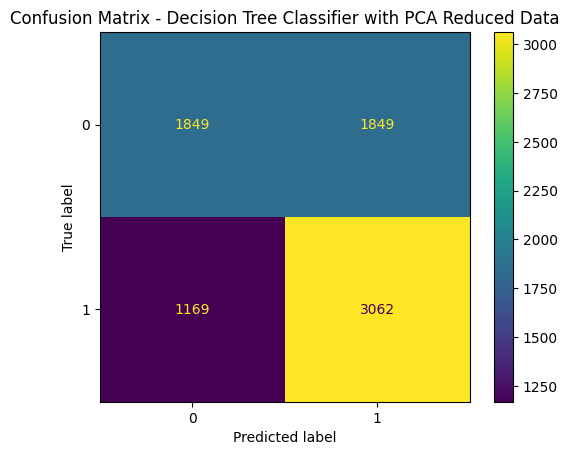

              precision    recall  f1-score   support

           0       0.61      0.50      0.55      3698
           1       0.62      0.72      0.67      4231

    accuracy                           0.62      7929
   macro avg       0.62      0.61      0.61      7929
weighted avg       0.62      0.62      0.61      7929


 0.61803 +/- 0.00564


In [166]:
# Fitting the PCA Reduced data into Decision Tree Classifier model
DT_clf_pca = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=32, random_state=42)
DT_clf_pca.fit(X_train_pca, y_train)

# The model's score on the testing data
print('PCA REDUCED DATA')
DT_clf_score_pca = DT_clf_pca.score(X_test_pca, y_test).round(5)
print('Classification accuracy: ', DT_clf_score_pca)

## Confusion Matrix - After PCA

# Model's predictions on the test data
y_pred_DT_pca = DT_clf_pca.predict(X_test_pca)

disp_DT_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_DT_pca))
disp_DT_pca.plot()
plt.title('Confusion Matrix - Decision Tree Classifier with PCA Reduced Data')
plt.show()
#  Classification report - After PCA

DT_report_pca = classification_report(y_test, y_pred_DT_pca)
print(DT_report_pca)
# Cross validation of the Decision Tree Classifier model using 5 folds in terms of mean +/- std

cv_scores_DT_pca = cross_val_score(DT_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_DT_pca = (str(cv_scores_DT_pca.mean().round(5)) + ' +/- ' + str(cv_scores_DT_pca.std().round(5)))
print('\n', cv_score_DT_pca)

**RFE Data**

DecisionTreeClassifier(max_leaf_nodes=32, random_state=42)

PCA REDUCED DATA
Classification accuracy:  0.63854


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree Classifier with PCA Reduced Data')

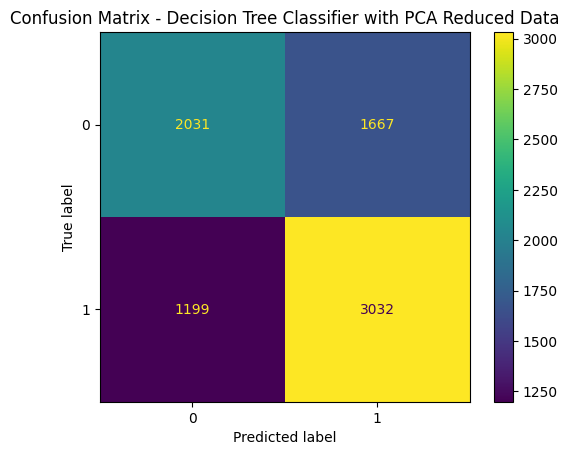

              precision    recall  f1-score   support

           0       0.63      0.55      0.59      3698
           1       0.65      0.72      0.68      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.63      0.63      7929
weighted avg       0.64      0.64      0.64      7929


 0.6369 +/- 0.00689


In [167]:
# Fitting the RFE Reduced data into Decision Tree Classifier model
DT_clf_rfe = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=32, random_state=42)
DT_clf_rfe.fit(X_train_RFE, y_train)

# The model's score on the testing data
print('PCA REDUCED DATA')
DT_clf_score_rfe = DT_clf_rfe.score(X_test_RFE, y_test).round(5)
print('Classification accuracy: ', DT_clf_score_rfe)

## Confusion Matrix - After PCA

# Model's predictions on the test data
y_pred_DT_rfe = DT_clf_rfe.predict(X_test_RFE)

disp_DT_rfe = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_DT_rfe))
disp_DT_rfe.plot()
plt.title('Confusion Matrix - Decision Tree Classifier with PCA Reduced Data')
plt.show()
#  Classification report - After PCA

DT_report_rfe = classification_report(y_test, y_pred_DT_rfe)
print(DT_report_rfe)
# Cross validation of the Decision Tree Classifier model using 5 folds in terms of mean +/- std

cv_scores_DT_rfe = cross_val_score(DT_clf_rfe, X_train_RFE, y_train, scoring='f1_weighted', cv=5)
cv_score_DT_rfe = (str(cv_scores_DT_rfe.mean().round(5)) + ' +/- ' + str(cv_scores_DT_rfe.std().round(5)))
print('\n', cv_score_DT_rfe)

### Random Forest

**Regular Data**

RandomForestClassifier(max_leaf_nodes=32, n_jobs=-1, random_state=42)

REGULAR DATA
R2 score:  0.656072644721907


Text(0.5, 1.0, 'Confusion Matrix - Random Forest Classifier with Regular Data')

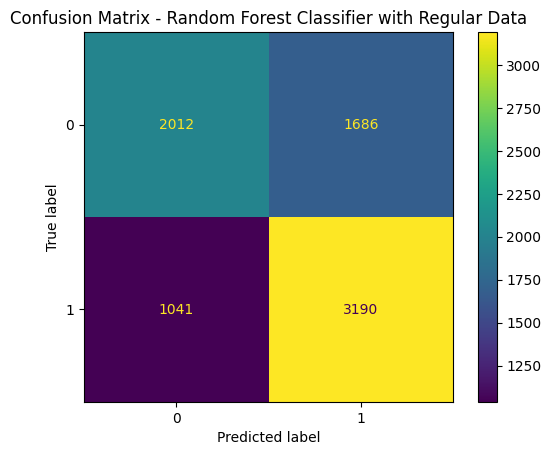

              precision    recall  f1-score   support

           0       0.66      0.54      0.60      3698
           1       0.65      0.75      0.70      4231

    accuracy                           0.66      7929
   macro avg       0.66      0.65      0.65      7929
weighted avg       0.66      0.66      0.65      7929


 0.65575 +/- 0.00583


In [168]:
# Importing the RandomForestClassifier class from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Fitting the data into Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=32, n_jobs=-1, random_state=42)
RF_clf.fit(X_train, y_train)

# The Random Forest model's score on the testing data
print('REGULAR DATA')
RF_clf_score = RF_clf.score(X_test, y_test)
print('R2 score: ', RF_clf_score)

## Confusion Matrix

# Model's predictions on the test data
y_pred_RF = RF_clf.predict(X_test)

disp_RF = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_RF))
disp_RF.plot()
plt.title('Confusion Matrix - Random Forest Classifier with Regular Data')
plt.show()

# Random Forest Classifier - Classification report

RF_report = classification_report(y_test, y_pred_RF)
print(RF_report)

# Cross validation of the Random Forest Classifier model using 5 folds in terms of mean +/- std

cv_scores_RF = cross_val_score(RF_clf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_RF = (str(cv_scores_RF.mean().round(5)) + ' +/- ' + str(cv_scores_RF.std().round(5)))
print('\n', cv_score_RF)

**PCA Reduced Data**

RandomForestClassifier(max_leaf_nodes=32, n_jobs=-1, random_state=42)

PCA REDUCED DATA
R2 score:  0.6409383276579644


Text(0.5, 1.0, 'Confusion Matrix - Random Forest Classifier with PCA Reduced Data')

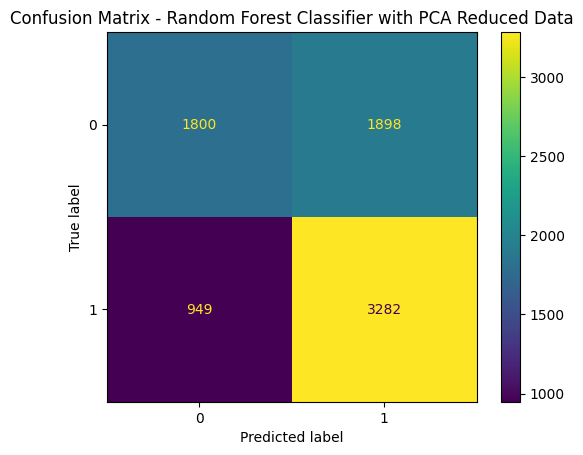

              precision    recall  f1-score   support

           0       0.65      0.49      0.56      3698
           1       0.63      0.78      0.70      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.63      0.63      7929
weighted avg       0.64      0.64      0.63      7929


 0.63012 +/- 0.00606


In [169]:
# Fitting the PCA Reduced data into Random Forest Classifier model
RF_clf_pca = RandomForestClassifier(n_estimators=100, max_leaf_nodes=32, n_jobs=-1, random_state=42)
RF_clf_pca.fit(X_train_pca, y_train)

# The model's score on the testing data
print("PCA REDUCED DATA")
RF_clf_score_pca = RF_clf_pca.score(X_test_pca, y_test)
print('R2 score: ', RF_clf_score_pca)
## Confusion Matrix - After PCA

# Model's predictions on the test data
y_pred_RF_pca = RF_clf_pca.predict(X_test_pca)

disp_RF_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_RF_pca))
disp_RF_pca.plot()
plt.title('Confusion Matrix - Random Forest Classifier with PCA Reduced Data')
plt.show()
#  Classification report - After Standardization

RF_report_pca = classification_report(y_test, y_pred_RF_pca)
print(RF_report_pca)

# Cross validation of the Random Forest Classifier model using 5 folds in terms of mean +/- std

cv_scores_RF_pca = cross_val_score(RF_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_RF_pca = (str(cv_scores_RF_pca.mean().round(5)) + ' +/- ' + str(cv_scores_RF_pca.std().round(5)))
print('\n', cv_score_RF_pca)

**RFE Data**

RandomForestClassifier(max_leaf_nodes=32, n_jobs=-1, random_state=42)

RFE REDUCED DATA
R2 score:  0.6456047420860134


Text(0.5, 1.0, 'Confusion Matrix - Random Forest Classifier with RFE Reduced Data')

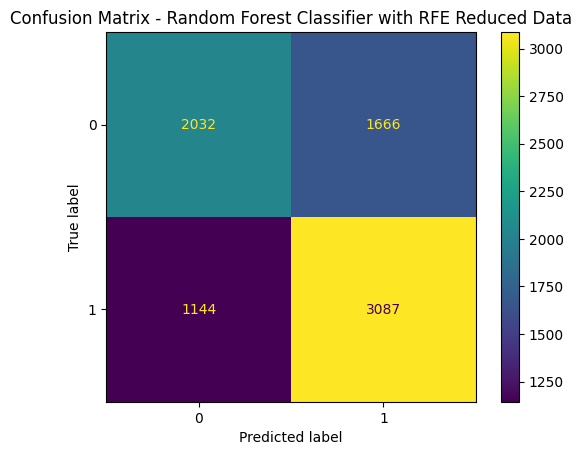

              precision    recall  f1-score   support

           0       0.64      0.55      0.59      3698
           1       0.65      0.73      0.69      4231

    accuracy                           0.65      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.65      0.64      7929


 0.63819 +/- 0.00766


In [170]:
# Fitting the rfe Reduced data into Random Forest Classifier model
RF_clf_rfe = RandomForestClassifier(n_estimators=100, max_leaf_nodes=32, n_jobs=-1, random_state=42)
RF_clf_rfe.fit(X_train_RFE, y_train)

# The model's score on the testing data
print("RFE REDUCED DATA")
RF_clf_score_rfe = RF_clf_rfe.score(X_test_RFE, y_test)
print('R2 score: ', RF_clf_score_rfe)
## Confusion Matrix - After rfe

# Model's predictions on the test data
y_pred_RF_rfe = RF_clf_rfe.predict(X_test_RFE)

disp_RF_rfe = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_RF_rfe))
disp_RF_rfe.plot()
plt.title('Confusion Matrix - Random Forest Classifier with RFE Reduced Data')
plt.show()
#  Classification report - After Standardization

RF_report_rfe = classification_report(y_test, y_pred_RF_rfe)
print(RF_report_rfe)

# Cross validation of the Random Forest Classifier model using 5 folds in terms of mean +/- std

cv_scores_RF_rfe = cross_val_score(RF_clf_rfe, X_train_RFE, y_train, scoring='f1_weighted', cv=5)
cv_score_RF_rfe = (str(cv_scores_RF_rfe.mean().round(5)) + ' +/- ' + str(cv_scores_RF_rfe.std().round(5)))
print('\n', cv_score_RF_rfe)

### AdaBoost

**Regular Data**

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=32),
                   learning_rate=0.5, n_estimators=100, random_state=42)

REGULAR DATA
R2 score:  0.6432084752175558


Text(0.5, 1.0, 'Confusion Matrix - AdaBoost Classifier with Regular Data')

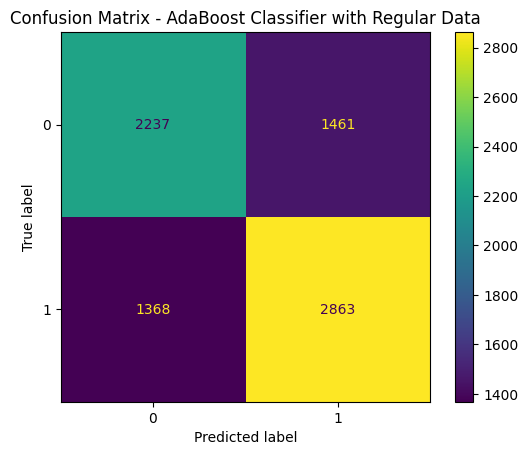

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      3698
           1       0.66      0.68      0.67      4231

    accuracy                           0.64      7929
   macro avg       0.64      0.64      0.64      7929
weighted avg       0.64      0.64      0.64      7929


 0.63678 +/- 0.00598


In [171]:
# Importing the AdaBoostClassifier class from Scikit-Learn
from sklearn.ensemble import AdaBoostClassifier

# Fitting the data into AdaBoost Classifier model
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), n_estimators=100, learning_rate=0.5, algorithm='SAMME.R', random_state=42)
ada_clf.fit(X_train, y_train)

# The model's score on the testing data
print('REGULAR DATA')
ada_clf_score = ada_clf.score(X_test, y_test)
print('R2 score: ', ada_clf_score)

## Confusion Matrix

# Model's predictions on the test data
y_pred_ada = ada_clf.predict(X_test)

disp_ada = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_ada))
disp_ada.plot()
plt.title('Confusion Matrix - AdaBoost Classifier with Regular Data')
plt.show()  

# AdaBoost Classifier - Classification report

ada_report = classification_report(y_test, y_pred_ada)
print(ada_report)

#Cross validation of the AdaBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_ada = cross_val_score(ada_clf, X_train, y_train, scoring='f1_weighted', cv=5)
cv_score_ada = (str(cv_scores_ada.mean().round(5)) + ' +/- ' + str(cv_scores_ada.std().round(5)))
print('\n', cv_score_ada)

**PCA Data**

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=32),
                   learning_rate=0.5, n_estimators=100, random_state=42)

PCA REDUCED DATA
R2 score:  0.6163450624290578


Text(0.5, 1.0, 'Confusion Matrix - AdaBoost Classifier with PCA Reduced Data')

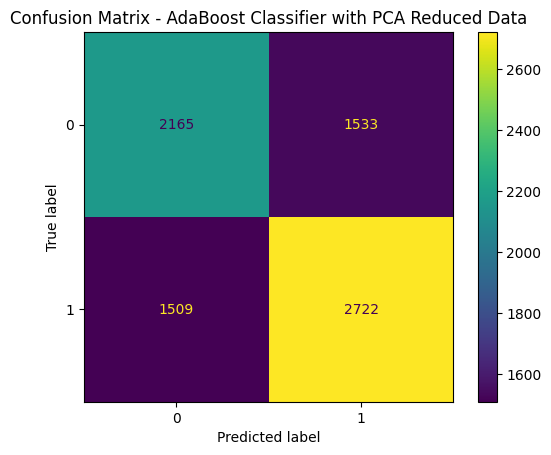

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      3698
           1       0.64      0.64      0.64      4231

    accuracy                           0.62      7929
   macro avg       0.61      0.61      0.61      7929
weighted avg       0.62      0.62      0.62      7929


 0.60877 +/- 0.00344


In [172]:
# Fitting the data into AdaBoost Classifier model
ada_clf_pca = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), n_estimators=100, learning_rate=0.5, algorithm='SAMME.R', random_state=42)
ada_clf_pca.fit(X_train_pca, y_train)

# The model's score on the testing data
print('PCA REDUCED DATA')
ada_clf_score_pca = ada_clf_pca.score(X_test_pca, y_test)
print('R2 score: ', ada_clf_score_pca)

## Confusion Matrix

# Model's predictions on the test data
y_pred_ada_pca = ada_clf_pca.predict(X_test_pca)

disp_ada_pca = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_ada_pca))
disp_ada_pca.plot()
plt.title('Confusion Matrix - AdaBoost Classifier with PCA Reduced Data')
plt.show()

# AdaBoost Classifier - Classification report

ada_report_pca = classification_report(y_test, y_pred_ada_pca)
print(ada_report_pca)

# Cross validation of the AdaBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_ada_pca = cross_val_score(ada_clf_pca, X_train_pca, y_train, scoring='f1_weighted', cv=5)
cv_score_ada_pca = (str(cv_scores_ada_pca.mean().round(5)) + ' +/- ' + str(cv_scores_ada_pca.std().round(5)))
print('\n', cv_score_ada_pca)

**RFE Data**

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=32),
                   learning_rate=0.5, n_estimators=100, random_state=42)

RFE REDUCED DATA
R2 score:  0.6061293984108967


Text(0.5, 1.0, 'Confusion Matrix - AdaBoost Classifier with RFE Reduced Data')

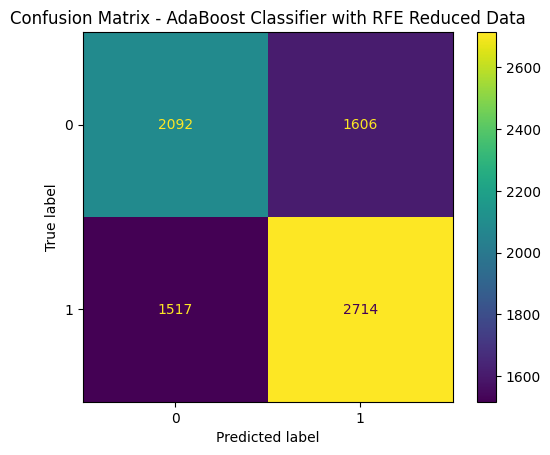

              precision    recall  f1-score   support

           0       0.58      0.57      0.57      3698
           1       0.63      0.64      0.63      4231

    accuracy                           0.61      7929
   macro avg       0.60      0.60      0.60      7929
weighted avg       0.61      0.61      0.61      7929


 0.61006 +/- 0.00386


In [173]:
# Fitting the data into AdaBoost Classifier model
ada_clf_rfe = AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), n_estimators=100, learning_rate=0.5, algorithm='SAMME.R', random_state=42)
ada_clf_rfe.fit(X_train_RFE, y_train)

# The model's score on the testing data
print('RFE REDUCED DATA')
ada_clf_score_rfe = ada_clf_rfe.score(X_test_RFE, y_test)
print('R2 score: ', ada_clf_score_rfe)

## Confusion Matrix

# Model's predictions on the test data
y_pred_ada_rfe = ada_clf_rfe.predict(X_test_RFE)

disp_ada_rfe = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred_ada_rfe))
disp_ada_rfe.plot()
plt.title('Confusion Matrix - AdaBoost Classifier with RFE Reduced Data')
plt.show()

# AdaBoost Classifier - Classification report

ada_report_rfe = classification_report(y_test, y_pred_ada_rfe)
print(ada_report_rfe)

# Cross validation of the AdaBoost Classifier model using 5 folds in terms of mean +/- std

cv_scores_ada_rfe = cross_val_score(ada_clf_rfe, X_train_RFE, y_train, scoring='f1_weighted', cv=5)
cv_score_ada_rfe = (str(cv_scores_ada_rfe.mean().round(5)) + ' +/- ' + str(cv_scores_ada_rfe.std().round(5)))
print('\n', cv_score_ada_rfe)

### Result

#### Classification Accuracy

In [174]:
row_names = ['Logistic Regression', 'LinearSVC', 'Linear kernel SVC', 'Polynomial kernel SVC', 'Decision Tree', 'Random Forest', 'AdaBoost']
col_names = ['Regular Data', 'PCA Reduced Data', 'RFE Reduced Data']
score_matrix = np.array([lr_score, lr_score_pca, lr_score_rfe , lin_svc_score, lin_svc_score_pca, lin_svc_score_rfe,
                         0,svc_lin_score, svc_lin_score_rfe, 0, svc_poly_score,svc_poly_score_rfe, 
                         DT_clf_score, DT_clf_score_pca, DT_clf_score_rfe,RF_clf_score, RF_clf_score_pca, RF_clf_score_rfe,
                         ada_clf_score, ada_clf_score_pca, ada_clf_score_rfe]).reshape(len(row_names),len(col_names))
score_df = pd.DataFrame(score_matrix, columns=col_names, index=row_names)
score_df = score_df.replace(0, '-')
score_df

,Regular Data,PCA Reduced Data,RFE Reduced Data
Logistic Regression,0.58305,0.636150,0.632870
LinearSVC,0.46601,0.637530,0.632240
Linear kernel SVC,-,0.623910,0.623280
Polynomial kernel SVC,-,0.646110,0.638420
Decision Tree,0.64699,0.619370,0.638540
Random Forest,0.656073,0.640938,0.645605
AdaBoost,0.643208,0.616345,0.606129


#### Cross-validated Weighted F1-scores

In [175]:
cv_score_matrix = np.array([cv_score_lr, cv_score_lr_pca, cv_score_lr_rfe,cv_score_linsvc, cv_score_linsvc_pca, cv_score_linsvc_rfe,
                            0, cv_score_svclin, cv_score_svclin_rfe, 0, cv_score_svcpoly, cv_score_svcpoly_rfe, 
                            cv_score_DT, cv_score_DT_pca,cv_score_DT_rfe, cv_score_RF, cv_score_RF_pca, cv_score_RF_rfe,
                            cv_score_ada, cv_score_ada_pca, cv_score_ada_rfe]).reshape(len(row_names),len(col_names))
cv_score_df = pd.DataFrame(cv_score_matrix, columns=col_names, index=row_names)
cv_score_df = cv_score_df.replace(0, '-')
cv_score_df

,Regular Data,PCA Reduced Data,RFE Reduced Data
Logistic Regression,0.58698 +/- 0.00565,0.63229 +/- 0.00806,0.63048 +/- 0.00571
LinearSVC,0.47361 +/- 0.02638,0.63373 +/- 0.00877,0.62998 +/- 0.00594
Linear kernel SVC,0,0.6167 +/- 0.00878,0.61682 +/- 0.00717
Polynomial kernel SVC,0,0.64094 +/- 0.00669,0.64033 +/- 0.01045
Decision Tree,0.64118 +/- 0.00636,0.61803 +/- 0.00564,0.6369 +/- 0.00689
Random Forest,0.65575 +/- 0.00583,0.63012 +/- 0.00606,0.63819 +/- 0.00766
AdaBoost,0.63678 +/- 0.00598,0.60877 +/- 0.00344,0.61006 +/- 0.00386


# 4-聚类分析

In [254]:
df = X_pca

In [255]:
# 去除极端异常值
feature_cols = df.columns.tolist
feature_cols

<bound method RangeIndex.tolist of RangeIndex(start=0, stop=21, step=1)>

In [256]:
def detect_outliers(df, n, features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in range(0,21):
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # quartile spacing (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 3 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than n outliers
    outlier_indices = Counter(outlier_indices)#Get the index and the number of outliers for the index
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

In [257]:
drop_row=detect_outliers(df, 1,feature_cols)
data_clean=df.drop(drop_row)
df_new = data_clean.reset_index(drop=True)
drop_row

[4550,
 7696,
 16782,
 16791,
 20484,
 20777,
 20825,
 21538,
 27361,
 27876,
 28664,
 29601,
 29793,
 29924,
 30644,
 31489,
 32329,
 32824,
 33460,
 33690,
 33791,
 34119,
 34120,
 34131,
 34622,
 34713,
 34860,
 35510,
 35620,
 36217,
 36643,
 37069,
 37269,
 38245,
 38428,
 38654,
 38885,
 39248,
 39294,
 39500,
 5504,
 5674,
 6131,
 6345,
 7109,
 9268,
 10261,
 12300,
 14684,
 16281,
 16294,
 17137,
 17319,
 17500,
 17863,
 18037,
 18101,
 18303,
 19850,
 23062,
 24792,
 26607,
 27827,
 28124,
 34476,
 37005,
 3878,
 4438,
 5598,
 6383,
 6597,
 6598,
 6638,
 8490,
 9379,
 9535,
 9590,
 9744,
 10619,
 11319,
 11344,
 11525,
 13797,
 15198,
 15752,
 16348,
 16384,
 16465,
 16482,
 17712,
 18309,
 19064,
 19304,
 19495,
 19771,
 19963,
 19970,
 20642,
 21470,
 21669,
 22687,
 23226,
 23622,
 23684,
 23806,
 23857,
 23862,
 24344,
 24555,
 25842,
 25915,
 26335,
 26477,
 26839,
 26926,
 27756,
 28163,
 28927,
 29102,
 29269,
 30520,
 31497,
 32633,
 32665,
 33406,
 35246,
 37176,
 390

In [273]:
# y = data['popularity']
y_clean=y.drop(drop_row)
y_new = y_clean.reset_index(drop=True)
y_new.shape

(39644,)

In [258]:
df_new.shape

(39224, 21)

在X_pca的基础上进行聚类分析

d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

<Figure size 1000x800 with 0 Axes>

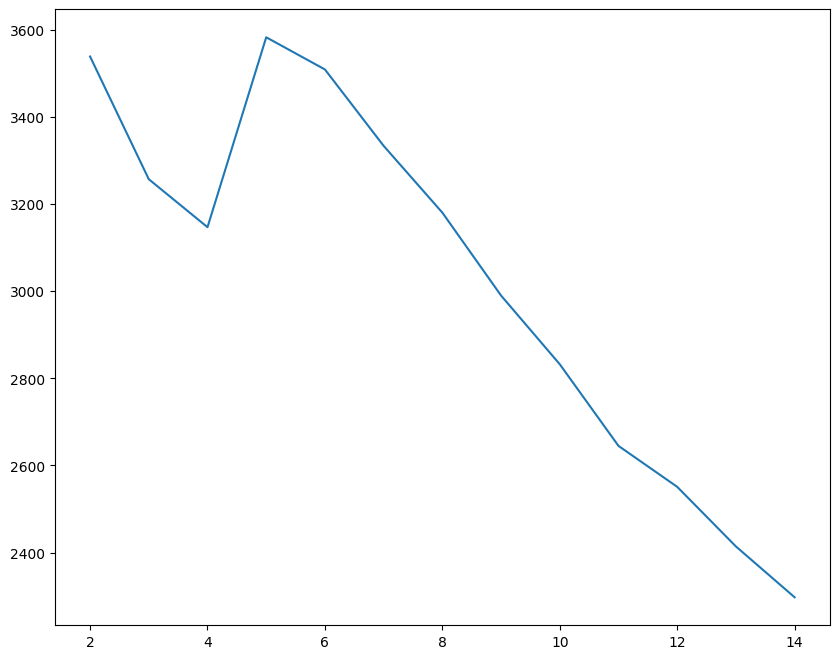

In [259]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
chs = []
for i in range(2,15):
    kmeans = KMeans(n_clusters=i,random_state=111).fit(df_new)
    chsScore = calinski_harabasz_score(df_new,kmeans.labels_)
    chs.append(chsScore)
plt.figure(figsize=(10, 8))
plt.plot(range(2, 15), chs, linewidth=1.5, linestyle='-')
plt.show()

d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

<Figure size 1000x600 with 0 Axes>

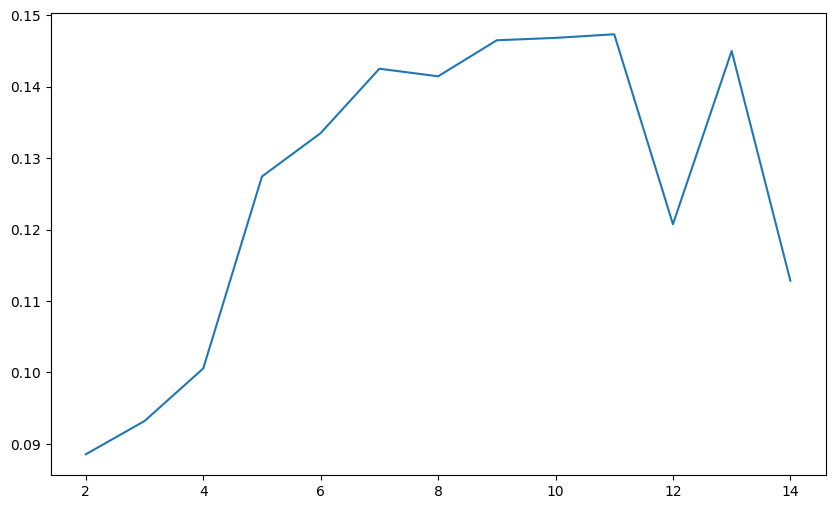

In [260]:
from sklearn.metrics import silhouette_score
silhouetteScore = []
for i in range(2,15):
    # 构建并训练模型
    kmeans = KMeans(n_clusters=i,random_state=123).fit(df_new)
    score = silhouette_score(df_new,kmeans.labels_)
    silhouetteScore.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(2,15),silhouetteScore,linewidth=1.5,linestyle='-')
plt.show()

d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

Text(0.5, 0, 'number of clusters')

Text(0, 0.5, 'distortions')

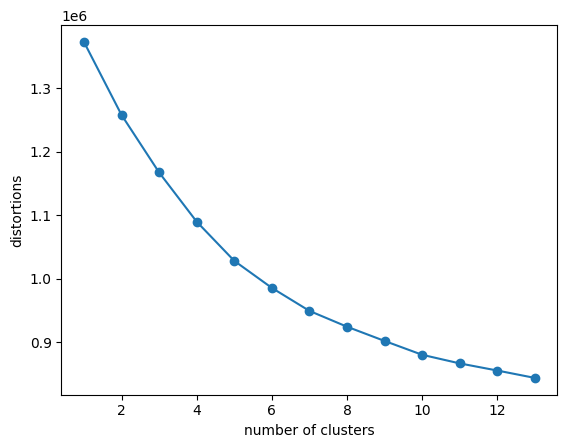

In [261]:
#如果两个结果不一致时还可以用肘方法看k值
d=[]
for i in range(2,15):    #k取值2~11，做kmeans聚类，看不同k值对应的簇内误差平方和
    km=KMeans(n_clusters=i,random_state=123).fit(df_new)
    d.append(km.inertia_)  #inertia簇内误差平方和

plt.plot(range(1,14),d,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortions')
plt.show()

综上选择6个类别进行聚类分析

In [265]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=6,random_state=123).fit(df_new)
y_pred = cluster.labels_


d:\Python3.8\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 0, 'PCA component 1')

Text(0.5, 0.5, 'PCA component 2')

Text(0.5, 0, 'PCA component 3')

Text(0.5, 0.92, 'K-means Clustering in 3D')

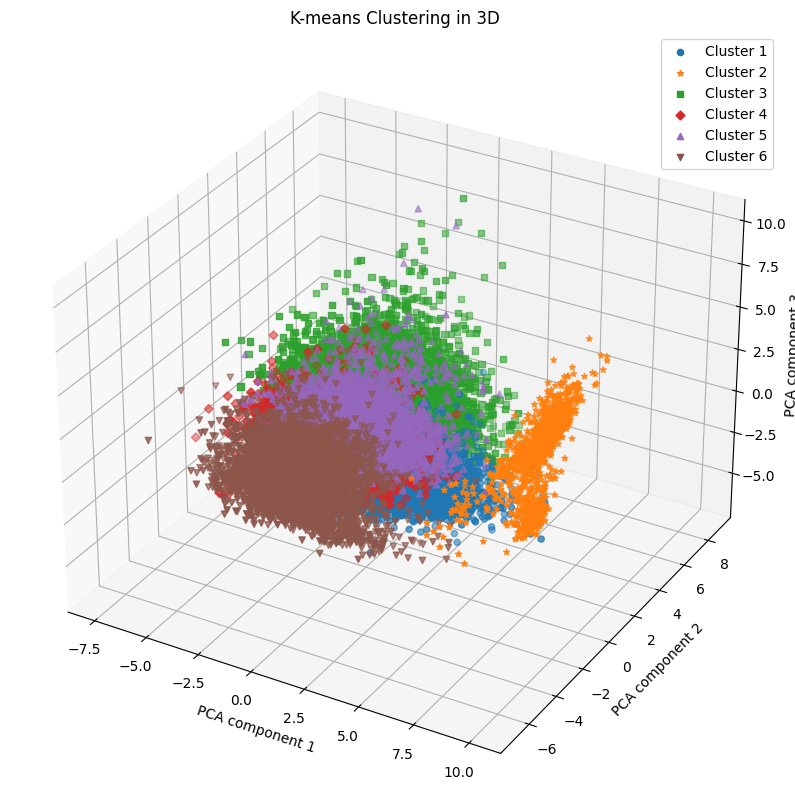

In [266]:
# 添加label列
df_new['labels']=y_pred

# 分割数据为六个簇
df_clusters = [df_new[df_new['labels'] == i] for i in range(6)]

# 画3D图
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 定义不同簇使用的标记
markers = ['o', '*', 's', 'D', '^', 'v']

# 遍历每个簇，用不同的颜色和标记表示
for i, (df_cluster, marker) in enumerate(zip(df_clusters, markers)):
    ax.scatter(df_cluster[0], df_cluster[1], df_cluster[2], label=f'Cluster {i+1}', marker=marker)

# 设置图例、标签和标题
ax.legend()
ax.set_xlabel("PCA component 1")
ax.set_ylabel("PCA component 2")
ax.set_zlabel("PCA component 3")
ax.set_title("K-means Clustering in 3D")

plt.show()

## 对单簇进行二分类测试

In [275]:
# 复制y对应到每个簇
y_train_clusters = [y_new[df_new['labels'] == i] for i in range(6)]

In [277]:
y_new.shape
df_new.shape

(39224,)

(39224, 22)

In [278]:
for i, df_cluster in enumerate(df_clusters):
    y_train_clusters[i].shape

(7753,)

(1145,)

(11655,)

(7875,)

(6721,)

(4075,)

In [279]:
# 打印每个簇的size
for i, df_cluster in enumerate(df_clusters):
    print(f'Number of samples in cluster {i+1}: {df_cluster.shape}') 
    print(f'Number of shares in cluster {i+1}: {y_train_clusters[i].shape}') 

Number of samples in cluster 1: (7753, 22)
Number of shares in cluster 1: (7753,)
Number of samples in cluster 2: (1145, 22)
Number of shares in cluster 2: (1145,)
Number of samples in cluster 3: (11655, 22)
Number of shares in cluster 3: (11655,)
Number of samples in cluster 4: (7875, 22)
Number of shares in cluster 4: (7875,)
Number of samples in cluster 5: (6721, 22)
Number of shares in cluster 5: (6721,)
Number of samples in cluster 6: (4075, 22)
Number of shares in cluster 6: (4075,)


In [ ]:
# 每个簇要测试7种的准确率，
# 横轴是不同的簇，纵轴是不同的算法，每个算法都有7个准确率，所以是一个7*6的矩阵
# 要不要+ cv F1 scores，那就是 6 * 7 + 6 * 7
# 然后对每个算法的准确率求平均，得到一个6*1的矩阵，然后对比

**1. Logsitic Regression**

In [305]:
# 对每个簇进行Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 定义一个空的矩阵，用来存放每个簇的准确率
lr_scores_clusters = np.zeros((6, 7))

# 遍历每个簇和每个y_train
for i, df_cluster in enumerate(df_clusters):
    # 从每个簇中取出X和y
    cluster_X = df_cluster.drop('labels', axis=1)
    cluster_y = y_train_clusters[i]
    
    # 划分数据
    cluster_X_train, cluster_X_test, cluster_y_train, cluster_y_test = train_test_split(cluster_X, cluster_y, test_size=0.2, stratify=cluster_y, random_state=42)

    lr_clf_cluster = LogisticRegression()
    lr_clf_cluster.fit(cluster_X_train, cluster_y_train)

    # The model's score on the testing data
    print(f'CLUSTER {i+1}')
    lr_score_cluster = lr_clf_cluster.score(cluster_X_test, cluster_y_test).round(5)
    print('Classification accuracy: ', lr_score_cluster)
    
    # 把每个簇的准确率存入矩阵
    lr_scores_clusters[i] = lr_score_cluster

    # 对每个簇进行logstic的交叉验证
    cv_scores_lr_cluster = cross_val_score(lr_clf_cluster, cluster_X_train, cluster_y_train, scoring='f1_weighted', cv=5)
    cv_score_lr_cluster = (str(cv_scores_lr_cluster.mean().round(5)) + ' +/- ' + str(cv_scores_lr_cluster.std().round(5)))
    print('\n',cv_score_lr_cluster)

LogisticRegression()

CLUSTER 1
Classification accuracy:  0.65893

 0.62771 +/- 0.00478


d:\Python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

CLUSTER 2
Classification accuracy:  0.58515


d:\Python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu


 0.56518 +/- 0.01755


d:\Python3.8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

CLUSTER 3
Classification accuracy:  0.67096

 0.64225 +/- 0.00732


LogisticRegression()

CLUSTER 4
Classification accuracy:  0.64508

 0.59578 +/- 0.00694


LogisticRegression()

CLUSTER 5
Classification accuracy:  0.68401

 0.67117 +/- 0.01651


LogisticRegression()

CLUSTER 6
Classification accuracy:  0.61472

 0.60513 +/- 0.01261


In [306]:
# 根据簇的准确率矩阵，加权求该算法的平均准确率
lr_scores_clusters_weighted = np.average(lr_scores_clusters, axis=0, weights=[df_cluster.shape[0] for df_cluster in df_clusters])
# 输出每个算法的平均准确率
print('Classification accuracy: ', lr_scores_clusters_weighted[0])

Classification accuracy:  0.6572746290536406


**2. SVM**

In [289]:
from sklearn.svm import LinearSVC

# 定义一个空的矩阵，用来存放每个簇的准确率
lin_svc_scores_clusters = np.zeros((6, 7))

# 遍历每个簇和每个y_train
for i, df_cluster in enumerate(df_clusters):
    # 从每个簇中取出X和y
    cluster_X = df_cluster.drop('labels', axis=1)
    cluster_y = y_train_clusters[i]
    
    # 划分数据
    cluster_X_train, cluster_X_test, cluster_y_train, cluster_y_test = train_test_split(cluster_X, cluster_y, test_size=0.2, stratify=cluster_y, random_state=42)

    lin_svc_clf_cluster = LinearSVC(C=2)
    lin_svc_clf_cluster.fit(cluster_X_train, cluster_y_train)

    # The model's score on the testing data
    print(f'CLUSTER {i+1}')
    lin_svc_score_cluster = lin_svc_clf_cluster.score(cluster_X_test, cluster_y_test).round(5)
    print('Classification accuracy: ', lin_svc_score_cluster)
    
    # 把每个簇的准确率存入矩阵
    lin_svc_scores_clusters[i] = lin_svc_score_cluster

    # 对每个簇进行linear svc的交叉验证
    cv_scores_linsvc_cluster = cross_val_score(lin_svc_clf_cluster, cluster_X_train, cluster_y_train, scoring='f1_weighted', cv=5)
    cv_score_linsvc_cluster = (str(cv_scores_linsvc_cluster.mean().round(5)) + ' +/- ' + str(cv_scores_linsvc_cluster.std().round(5)))
    print('\n',cv_score_linsvc_cluster)

# 根据簇的准确率矩阵，加权求该算法的平均准确率
lin_svc_scores_clusters_weighted = np.average(lin_svc_scores_clusters, axis=0, weights=[df_cluster.shape[0] for df_cluster in df_clusters])
# 输出每个算法的平均准确率
print('Classification accuracy: ', lin_svc_scores_clusters_weighted[0])


d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=2)

d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


CLUSTER 1
Classification accuracy:  0.66022


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: 


 0.62496 +/- 0.00736


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=2)

d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


CLUSTER 2
Classification accuracy:  0.53275


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: 


 0.55855 +/- 0.03267


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=2)

d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


CLUSTER 3
Classification accuracy:  0.67096


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: 


 0.64274 +/- 0.00834


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=2)

d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


CLUSTER 4
Classification accuracy:  0.64381


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: 


 0.59196 +/- 0.01121


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=2)

d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


CLUSTER 5
Classification accuracy:  0.68401


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: 


 0.66984 +/- 0.01846


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=2)

d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


CLUSTER 6
Classification accuracy:  0.61595


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Python3.8\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: 


 0.60614 +/- 0.01054
Classification accuracy:  0.6558727926779522


d:\Python3.8\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


**3. Using SVR with kernel**

In [301]:
from sklearn.svm import SVC

# 定义一个空的矩阵，用来存放每个簇的准确率
svclinker_scores_clusters = np.zeros((6, 7))

# 遍历每个簇和每个y_train
for i, df_cluster in enumerate(df_clusters):
    # 从每个簇中取出X和y
    cluster_X = df_cluster.drop('labels', axis=1)
    cluster_y = y_train_clusters[i]
    
    # 划分数据
    cluster_X_train, cluster_X_test, cluster_y_train, cluster_y_test = train_test_split(cluster_X, cluster_y, test_size=0.2, stratify=cluster_y, random_state=42)

    svclinker_clf_cluster = SVC(kernel='linear', C=2)
    svclinker_clf_cluster.fit(cluster_X_train, cluster_y_train)

    # The model's score on the testing data
    print(f'CLUSTER {i+1}')
    svclinker_score_cluster = svclinker_clf_cluster.score(cluster_X_test, cluster_y_test).round(5)
    print('Classification accuracy: ', svclinker_score_cluster)
    
    # 把每个簇的准确率存入矩阵
    svclinker_scores_clusters[i] = svclinker_score_cluster

    # 对每个簇进行linear svc的交叉验证
    cv_scores_svclinker_cluster = cross_val_score(svclinker_clf_cluster, cluster_X_train, cluster_y_train, scoring='f1_weighted', cv=5)
    cv_score_svclinker_cluster = (str(cv_scores_linsvc_cluster.mean().round(5)) + ' +/- ' + str(cv_scores_svclinker_cluster.std().round(5)))
    print('\n',cv_score_svclinker_cluster)

# 根据簇的准确率矩阵，加权求该算法的平均准确率
svclinker_scores_clusters_weighted = np.average(svclinker_scores_clusters, axis=0, weights=[df_cluster.shape[0] for df_cluster in df_clusters])
# 输出每个算法的平均准确率
print('Classification accuracy: ', svclinker_scores_clusters_weighted[0])



SVC(C=2, kernel='linear')

CLUSTER 1
Classification accuracy:  0.62992

 0.60614 +/- 0.0125


SVC(C=2, kernel='linear')

CLUSTER 2
Classification accuracy:  0.57205

 0.60614 +/- 0.01654


SVC(C=2, kernel='linear')

CLUSTER 3
Classification accuracy:  0.66152

 0.60614 +/- 0.00933


SVC(C=2, kernel='linear')

CLUSTER 4
Classification accuracy:  0.62413

 0.60614 +/- 0.00039


SVC(C=2, kernel='linear')

CLUSTER 5
Classification accuracy:  0.68327

 0.60614 +/- 0.01929


SVC(C=2, kernel='linear')

CLUSTER 6
Classification accuracy:  0.6135

 0.60614 +/- 0.05773
Classification accuracy:  0.6438934461044258


In [303]:
from sklearn.svm import SVC

# 定义一个空的矩阵，用来存放每个簇的准确率
svcpoly_scores_clusters = np.zeros((6, 7))

# 遍历每个簇和每个y_train
for i, df_cluster in enumerate(df_clusters):
    # 从每个簇中取出X和y
    cluster_X = df_cluster.drop('labels', axis=1)
    cluster_y = y_train_clusters[i]
    
    # 划分数据
    cluster_X_train, cluster_X_test, cluster_y_train, cluster_y_test = train_test_split(cluster_X, cluster_y, test_size=0.2, stratify=cluster_y, random_state=42)

    svcpoly_clf_cluster = SVC(kernel='poly', C=2)
    svcpoly_clf_cluster.fit(cluster_X_train, cluster_y_train)

    # The model's score on the testing data
    print(f'CLUSTER {i+1}')
    svcpoly_score_cluster = svcpoly_clf_cluster.score(cluster_X_test, cluster_y_test).round(5)
    print('Classification accuracy: ', svcpoly_score_cluster)
    
    # 把每个簇的准确率存入矩阵
    svcpoly_scores_clusters[i] = svcpoly_score_cluster

    # 对每个簇进行poly svc的交叉验证
    cv_scores_svcpoly_cluster = cross_val_score(svcpoly_clf_cluster, cluster_X_train, cluster_y_train, scoring='f1_weighted', cv=5)
    cv_score_svcpoly_cluster = (str(cv_scores_svcpoly_cluster.mean().round(5)) + ' +/- ' + str(cv_scores_svcpoly_cluster.std().round(5)))
    print('\n',cv_score_svcpoly_cluster)

# 根据簇的准确率矩阵，加权求该算法的平均准确率
svcpoly_scores_clusters_weighted = np.average(svcpoly_scores_clusters, axis=0, weights=[df_cluster.shape[0] for df_cluster in df_clusters])
# 输出每个算法的平均准确率
print('Classification accuracy: ', svcpoly_scores_clusters_weighted[0])



SVC(C=2, kernel='poly')

CLUSTER 1
Classification accuracy:  0.63894

 0.59304 +/- 0.01096


SVC(C=2, kernel='poly')

CLUSTER 2
Classification accuracy:  0.60262

 0.53158 +/- 0.01295


SVC(C=2, kernel='poly')

CLUSTER 3
Classification accuracy:  0.65809

 0.63316 +/- 0.00846


SVC(C=2, kernel='poly')

CLUSTER 4
Classification accuracy:  0.63746

 0.59489 +/- 0.01005


SVC(C=2, kernel='poly')

CLUSTER 5
Classification accuracy:  0.6855

 0.67308 +/- 0.01983


SVC(C=2, kernel='poly')

CLUSTER 6
Classification accuracy:  0.60491

 0.60838 +/- 0.01904
Classification accuracy:  0.647715478278605


**4. Decision Trees**

In [293]:
from sklearn.tree import DecisionTreeClassifier

# 定义一个空的矩阵，用来存放每个簇的准确率
dt_scores_clusters = np.zeros((6, 7))

# 遍历每个簇和每个y_train
for i, df_cluster in enumerate(df_clusters):
    # 从每个簇中取出X和y
    cluster_X = df_cluster.drop('labels', axis=1)
    cluster_y = y_train_clusters[i]
    
    # 划分数据
    cluster_X_train, cluster_X_test, cluster_y_train, cluster_y_test = train_test_split(cluster_X, cluster_y, test_size=0.2, stratify=cluster_y, random_state=42)

    dt_clf_cluster = DecisionTreeClassifier(criterion='gini', max_leaf_nodes=32, random_state=42)
    dt_clf_cluster.fit(cluster_X_train, cluster_y_train)

    # The model's score on the testing data
    print(f'CLUSTER {i+1}')
    dt_score_cluster = dt_clf_cluster.score(cluster_X_test, cluster_y_test).round(5)
    print('Classification accuracy: ', dt_score_cluster)
    
    # 把每个簇的准确率存入矩阵
    dt_scores_clusters[i] = dt_score_cluster

    # 对每个簇进行linear svc的交叉验证
    cv_scores_dt_cluster = cross_val_score(dt_clf_cluster, cluster_X_train, cluster_y_train, scoring='f1_weighted', cv=5)
    cv_score_dt_cluster = (str(cv_scores_dt_cluster.mean().round(5)) + ' +/- ' + str(cv_scores_dt_cluster.std().round(5)))
    print('\n',cv_score_dt_cluster)

# 根据簇的准确率矩阵，加权求该算法的平均准确率
dt_scores_clusters_weighted = np.average(dt_scores_clusters, axis=0, weights=[df_cluster.shape[0] for df_cluster in df_clusters])
# 输出每个算法的平均准确率
print('Classification accuracy: ', dt_scores_clusters_weighted[0])


DecisionTreeClassifier(max_leaf_nodes=32, random_state=42)

CLUSTER 1
Classification accuracy:  0.63572

 0.58336 +/- 0.02108


DecisionTreeClassifier(max_leaf_nodes=32, random_state=42)

CLUSTER 2
Classification accuracy:  0.55022

 0.55073 +/- 0.03401


DecisionTreeClassifier(max_leaf_nodes=32, random_state=42)

CLUSTER 3
Classification accuracy:  0.63878

 0.61476 +/- 0.01098


DecisionTreeClassifier(max_leaf_nodes=32, random_state=42)

CLUSTER 4
Classification accuracy:  0.6254

 0.57102 +/- 0.00841


DecisionTreeClassifier(max_leaf_nodes=32, random_state=42)

CLUSTER 5
Classification accuracy:  0.6342

 0.63947 +/- 0.0148


DecisionTreeClassifier(max_leaf_nodes=32, random_state=42)

CLUSTER 6
Classification accuracy:  0.59141

 0.59307 +/- 0.01917
Classification accuracy:  0.6271976063124617


**5. Random Forest**

In [297]:
from sklearn.ensemble import RandomForestClassifier
# 定义一个空的矩阵，用来存放每个簇的准确率
rf_scores_clusters = np.zeros((6, 7))

# 遍历每个簇和每个y_train
for i, df_cluster in enumerate(df_clusters):
    # 从每个簇中取出X和y
    cluster_X = df_cluster.drop('labels', axis=1)
    cluster_y = y_train_clusters[i]
    
    # 划分数据
    cluster_X_train, cluster_X_test, cluster_y_train, cluster_y_test = train_test_split(cluster_X, cluster_y, test_size=0.2, stratify=cluster_y, random_state=42)

    rf_clf_cluster =  RandomForestClassifier(n_estimators=100, max_leaf_nodes=32, n_jobs=-1, random_state=42)
    rf_clf_cluster.fit(cluster_X_train, cluster_y_train)

    # The model's score on the testing data
    print(f'CLUSTER {i+1}')
    rf_score_cluster = rf_clf_cluster.score(cluster_X_test, cluster_y_test).round(5)
    print('R2 score: ', rf_score_cluster)
    
    # 把每个簇的准确率存入矩阵
    rf_scores_clusters[i] = rf_score_cluster

    # 对每个簇进行linear svc的交叉验证
    cv_scores_rf_cluster = cross_val_score(rf_clf_cluster, cluster_X_train, cluster_y_train, scoring='f1_weighted', cv=5)
    cv_score_rf_cluster = (str(cv_scores_rf_cluster.mean().round(5)) + ' +/- ' + str(cv_scores_rf_cluster.std().round(5)))
    print('\n',cv_score_rf_cluster)

# 根据簇的准确率矩阵，加权求该算法的平均准确率
rf_scores_clusters_weighted = np.average(rf_scores_clusters, axis=0, weights=[df_cluster.shape[0] for df_cluster in df_clusters])
# 输出每个算法的平均准确率
print('Classification accuracy: ', rf_scores_clusters_weighted[0])


RandomForestClassifier(max_leaf_nodes=32, n_jobs=-1, random_state=42)

CLUSTER 1
R2 score:  0.64926

 0.60018 +/- 0.00928


RandomForestClassifier(max_leaf_nodes=32, n_jobs=-1, random_state=42)

CLUSTER 2
R2 score:  0.58079

 0.56889 +/- 0.01955


RandomForestClassifier(max_leaf_nodes=32, n_jobs=-1, random_state=42)

CLUSTER 3
R2 score:  0.66152

 0.63771 +/- 0.00418


RandomForestClassifier(max_leaf_nodes=32, n_jobs=-1, random_state=42)

CLUSTER 4
R2 score:  0.64254

 0.56129 +/- 0.01286


RandomForestClassifier(max_leaf_nodes=32, n_jobs=-1, random_state=42)

CLUSTER 5
R2 score:  0.67212

 0.65308 +/- 0.01968


RandomForestClassifier(max_leaf_nodes=32, n_jobs=-1, random_state=42)

CLUSTER 6
R2 score:  0.63681

 0.5702 +/- 0.00728
Classification accuracy:  0.6521786329798082


**6. AdaBoost**

In [298]:
from sklearn.ensemble import AdaBoostClassifier
# 定义一个空的矩阵，用来存放每个簇的准确率
ada_scores_clusters = np.zeros((6, 7))

# 遍历每个簇和每个y_train
for i, df_cluster in enumerate(df_clusters):
    # 从每个簇中取出X和y
    cluster_X = df_cluster.drop('labels', axis=1)
    cluster_y = y_train_clusters[i]
    
    # 划分数据
    cluster_X_train, cluster_X_test, cluster_y_train, cluster_y_test = train_test_split(cluster_X, cluster_y, test_size=0.2, stratify=cluster_y, random_state=42)

    ada_clf_cluster =  AdaBoostClassifier(DecisionTreeClassifier(max_leaf_nodes=32), n_estimators=100, learning_rate=0.5, algorithm='SAMME.R', random_state=42)
    ada_clf_cluster.fit(cluster_X_train, cluster_y_train)

    # The model's score on the testing data
    print(f'CLUSTER {i+1}')
    ada_score_cluster = ada_clf_cluster.score(cluster_X_test, cluster_y_test).round(5)
    print('R2 score: ', ada_score_cluster)
    
    # 把每个簇的准确率存入矩阵
    ada_scores_clusters[i] = ada_score_cluster

    # 对每个簇进行linear svc的交叉验证
    cv_scores_ada_cluster = cross_val_score(ada_clf_cluster, cluster_X_train, cluster_y_train, scoring='f1_weighted', cv=5)
    cv_score_ada_cluster = (str(cv_scores_ada_cluster.mean().round(5)) + ' +/- ' + str(cv_scores_ada_cluster.std().round(5)))
    print('\n',cv_score_ada_cluster)

# 根据簇的准确率矩阵，加权求该算法的平均准确率
ada_scores_clusters_weighted = np.average(ada_scores_clusters, axis=0, weights=[df_cluster.shape[0] for df_cluster in df_clusters])
# 输出每个算法的平均准确率
print('Classification accuracy: ', ada_scores_clusters_weighted[0])


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=32),
                   learning_rate=0.5, n_estimators=100, random_state=42)

CLUSTER 1
R2 score:  0.58736

 0.58611 +/- 0.00705


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=32),
                   learning_rate=0.5, n_estimators=100, random_state=42)

CLUSTER 2
R2 score:  0.55459

 0.55684 +/- 0.0292


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=32),
                   learning_rate=0.5, n_estimators=100, random_state=42)

CLUSTER 3
R2 score:  0.58215

 0.57897 +/- 0.01349


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=32),
                   learning_rate=0.5, n_estimators=100, random_state=42)

CLUSTER 4
R2 score:  0.57016

 0.58365 +/- 0.01628


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=32),
                   learning_rate=0.5, n_estimators=100, random_state=42)

CLUSTER 5
R2 score:  0.61561

 0.62589 +/- 0.01242


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=32),
                   learning_rate=0.5, n_estimators=100, random_state=42)

CLUSTER 6
R2 score:  0.5681

 0.57545 +/- 0.02001
Classification accuracy:  0.5842417445951459


**Result**

In [310]:
# 之前的输出结果
# lr_score = 0.58305
# lr_score_pca = 0.636150
# lr_score_rfe = 0.632870

# lin_svc_score = 0.46601
# lin_svc_score_pca = 0.637530
# lin_svc_score_rfe = 0.632240

# svc_lin_score = 0.623910
# svc_lin_score_rfe = 0.623280

# svc_poly_score = 0.646110
# svc_poly_score_rfe = 0.638420

# DT_clf_score = 0.64699
# DT_clf_score_pca = 0.619370
# DT_clf_score_rfe = 0.638540

# RF_clf_score = 0.656073
# RF_clf_score_pca = 0.640938
# RF_clf_score_rfe = 0.645605

# ada_clf_score = 0.643208
# ada_clf_score_pca = 0.616345
# ada_clf_score_rfe = 0.606129


row_names = ['Logistic Regression', 'LinearSVC', 'Linear kernel SVC', 'Polynomial kernel SVC', 'Decision Tree', 'Random Forest', 'AdaBoost']
new_col_names = ['Regular Data', 'PCA Reduced Data', 'RFE Reduced Data', 'Clustered Data']
new_score_matrix = np.array([lr_score, lr_score_pca, lr_score_rfe ,lr_scores_clusters_weighted[0] , lin_svc_score, lin_svc_score_pca, lin_svc_score_rfe,lin_svc_scores_clusters_weighted[0],
                         0,svc_lin_score, svc_lin_score_rfe, 0, svclinker_scores_clusters_weighted[0],svc_poly_score,svc_poly_score_rfe,  svcpoly_scores_clusters_weighted[0],
                         DT_clf_score, DT_clf_score_pca, DT_clf_score_rfe,dt_scores_clusters_weighted[0],RF_clf_score, RF_clf_score_pca, RF_clf_score_rfe,rf_scores_clusters_weighted[0],
                         ada_clf_score, ada_clf_score_pca, ada_clf_score_rfe,ada_scores_clusters_weighted[0]]).reshape(len(row_names),len(new_col_names))
score_df_cluster = pd.DataFrame(new_score_matrix, columns=new_col_names, index=row_names)
score_df_cluster = score_df_cluster.replace(0, '-')
score_df_cluster



,Regular Data,PCA Reduced Data,RFE Reduced Data,Clustered Data
Logistic Regression,0.58305,0.636150,0.632870,0.657275
LinearSVC,0.46601,0.637530,0.632240,0.655873
Linear kernel SVC,-,0.623910,0.623280,-
Polynomial kernel SVC,0.643893,0.646110,0.638420,0.647715
Decision Tree,0.64699,0.619370,0.638540,0.627198
Random Forest,0.656073,0.640938,0.645605,0.652179
AdaBoost,0.643208,0.616345,0.606129,0.584242
